In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
Patients = pd.read_csv('drive/My Drive/Colab Notebooks/Colorectal Cancer Patient Data.csv')
Patients

Unnamed: 0     ID_REF  Age (in years) Dukes Stage  Gender Location  \
0            0  GSM877126            62.0           A    Male     Left   
1            1  GSM877127            77.0           B    Male     Left   
2            2  GSM877128            66.0           C  Female     Left   
3            3  GSM877129            72.0           D  Female     Left   
4            4  GSM877130            75.0           C    Male     Left   
..         ...        ...             ...         ...     ...      ...   
58          58  GSM877185            48.0           D    Male    Right   
59          59  GSM877186            65.0           C    Male     Left   
60          60  GSM877187            71.0           A    Male   Rectum   
61          61  GSM877188            57.0           A    Male   Rectum   
62          62        NaN             NaN         NaN     NaN      NaN   

    DFS (in months)  DFS event  Adj_Radio  Adj_Chem  
0             108.0        0.0        1.0       0.0  
1              40.0        1.0        1.0       0.0  
2              49.0        0.0        1.0       0.0  
3              45.0        0.0        1.0       1.0  
4              40.0        0.0        0.0       1.0  
..              ...        ...        ...       ...  
58             64.0        0.0        1.0       0.0  
59             25.0        1.0        1.0       0.0  
60             58.0        1.0        1.0       0.0  
61             68.0        1.0        0.0       0.0  
62              NaN        NaN        NaN       NaN  

[63 rows x 10 columns]

In [ ]:
Patients = Patients.drop(index=62, axis=0)


In [ ]:
Patients = Patients.drop("Unnamed: 0", axis="columns")

In [ ]:
Patients.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_REF           62 non-null     object 
 1   Age (in years)   62 non-null     float64
 2   Dukes Stage      62 non-null     object 
 3   Gender           62 non-null     object 
 4   Location         62 non-null     object 
 5   DFS (in months)  62 non-null     float64
 6   DFS event        62 non-null     float64
 7   Adj_Radio        62 non-null     float64
 8   Adj_Chem         62 non-null     float64
dtypes: float64(5), object(4)
memory usage: 4.8+ KB


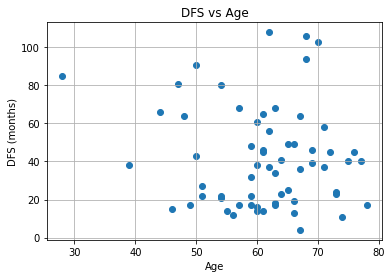

In [ ]:
plt.scatter(Patients['Age (in years)'], Patients['DFS (in months)'])
plt.title('DFS vs Age')
plt.xlabel('Age')
plt.ylabel('DFS (months)')
plt.grid()
plt.show()

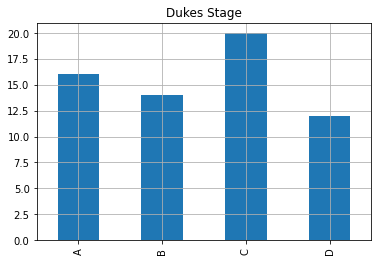

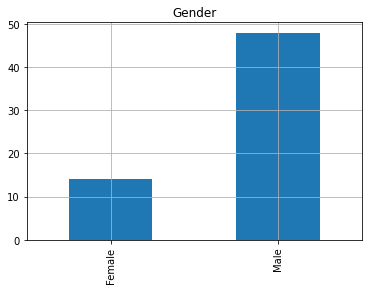

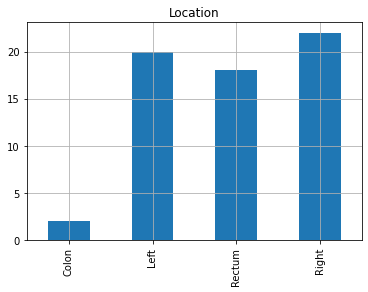

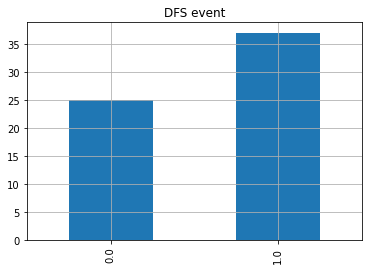

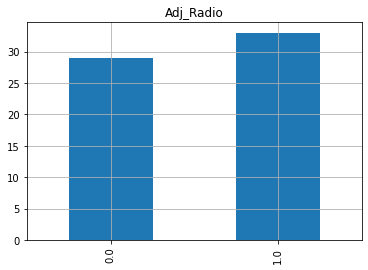

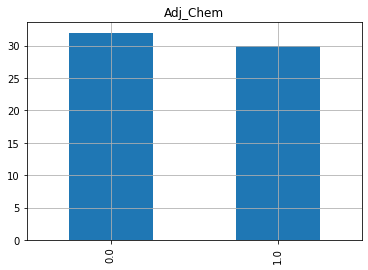

In [ ]:
features = ['Dukes Stage', 'Gender', 'Location', 
                'DFS event', 'Adj_Radio', 'Adj_Chem']
for f in features:
    Patients[f].value_counts().sort_index().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

In [ ]:
gene = pd.read_csv('drive/My Drive/Colorectal Cancer Gene Expression Data.csv')
gene.head()

Unnamed: 0     ID_REF  GSM877126  GSM877127  GSM877128  GSM877129  \
0           0     117_at   6.029834   6.344321   5.023127   4.612727   
1           1  1007_s_at   9.468893   9.994204  10.409823  10.596921   
2           2    1053_at   7.187090   7.705626   7.934057   7.446374   
3           3     121_at   6.807582   6.893130   7.165602   7.071417   
4           4  1255_g_at   3.084591   3.118704   2.984632   2.912851   

   GSM877130  GSM877131  GSM877132  GSM877133  ...  GSM877179  GSM877180  \
0   5.865944   6.863884   5.430316   4.285183  ...   5.111097   4.894901   
1  10.252547   9.671754  10.863276   9.788300  ...  10.084649  10.353849   
2   7.141105   7.040535   7.767728   8.035921  ...   6.119306   7.320403   
3   7.103383   7.504727   7.067674   7.259019  ...   7.267976   7.556417   
4   3.383726   2.772535   3.037304   2.986420  ...   2.741116   3.054084   

   GSM877181  GSM877182  GSM877183  GSM877184  GSM877185  GSM877186  \
0   6.660386   5.407188   7.228848   4.835558   5.694010   8.661629   
1  10.584126  10.585953   9.579042  10.343581   9.409749  10.427298   
2   7.326724   7.776103   8.273184   7.471584   7.488735   7.512632   
3   6.950901   6.898353   7.240276   7.920227   6.699796   7.046389   
4   3.186402   2.881039   2.754190   2.888331   3.201511   2.650723   

   GSM877187  GSM877188  
0   5.702601   4.500368  
1  10.309094  10.996956  
2   7.476872   7.453162  
3   7.349701   8.031972  
4   2.858642   2.787537  

[5 rows x 64 columns]

In [ ]:
gene = gene.transpose()
# let's check the result:
gene.head()

0          1         2         3          4         5     \
Unnamed: 0         0          1         2         3          4         5   
ID_REF        117_at  1007_s_at   1053_at    121_at  1255_g_at   1294_at   
GSM877126   6.029834   9.468893   7.18709  6.807582   3.084591  7.397013   
GSM877127   6.344321   9.994204  7.705626   6.89313   3.118704  7.163797   
GSM877128   5.023127  10.409823  7.934057  7.165602   2.984632  7.375224   

                6         7          8        9     ...        1925  \
Unnamed: 0         6         7          8        9  ...        1925   
ID_REF       1316_at   1320_at  1405_i_at  1431_at  ...  1554911_at   
GSM877126   6.525426  3.848253   7.572331   3.7482  ...    3.504809   
GSM877127   6.391195  4.202085   8.295322  3.11434  ...    3.957833   
GSM877128   5.538846  4.074462   7.055579  4.17227  ...    3.749518   

                  1926        1927          1928          1929          1930  \
Unnamed: 0        1926        1927          1928          1929          1930   
ID_REF      1554912_at  1554914_at  1554915_a_at  1554916_a_at  1554918_a_at   
GSM877126     2.856109    3.130712      5.603126      3.091348      4.009692   
GSM877127     2.988643    3.484177      6.601744      3.141737      4.679732   
GSM877128      2.61084    3.406207      6.003205      3.469987      4.781843   

                    1931        1932       1933          1934  
Unnamed: 0          1931        1932       1933          1934  
ID_REF      1554919_s_at  1554920_at  213418_at  1554921_a_at  
GSM877126         4.3504    2.512026   7.494499      4.030978  
GSM877127        4.50876    2.427697   8.156995       2.82709  
GSM877128       4.435054      2.5313   6.058687      2.930454  

[5 rows x 1935 columns]

In [ ]:
gene = gene.drop(index="Unnamed: 0", axis=0)

In [ ]:
gene

0          1         2         3          4         5     \
ID_REF       117_at  1007_s_at   1053_at    121_at  1255_g_at   1294_at   
GSM877126  6.029834   9.468893   7.18709  6.807582   3.084591  7.397013   
GSM877127  6.344321   9.994204  7.705626   6.89313   3.118704  7.163797   
GSM877128  5.023127  10.409823  7.934057  7.165602   2.984632  7.375224   
GSM877129  4.612727  10.596921  7.446374  7.071417   2.912851  7.596233   
...             ...        ...       ...       ...        ...       ...   
GSM877184  4.835558  10.343581  7.471584  7.920227   2.888331  7.628249   
GSM877185   5.69401   9.409749  7.488735  6.699796   3.201511  7.192814   
GSM877186  8.661629  10.427298  7.512632  7.046389   2.650723  5.992824   
GSM877187  5.702601  10.309094  7.476872  7.349701   2.858642  6.878941   
GSM877188  4.500368  10.996956  7.453162  8.031972   2.787537  7.744197   

               6         7          8         9     ...        1925  \
ID_REF      1316_at   1320_at  1405_i_at   1431_at  ...  1554911_at   
GSM877126  6.525426  3.848253   7.572331    3.7482  ...    3.504809   
GSM877127  6.391195  4.202085   8.295322   3.11434  ...    3.957833   
GSM877128  5.538846  4.074462   7.055579   4.17227  ...    3.749518   
GSM877129  5.989148  3.738205   9.683806  3.625413  ...    3.610429   
...             ...       ...        ...       ...  ...         ...   
GSM877184  6.061266  3.728707   7.830382  3.161023  ...    3.637413   
GSM877185  5.928451  3.675157   7.271917  3.392471  ...    3.733335   
GSM877186  5.285014  4.047409   5.335867  3.381974  ...    3.436002   
GSM877187  6.137371  3.863878   8.280592  3.222998  ...     3.43826   
GSM877188  5.793139  3.628732   6.951345  3.243738  ...     3.88677   

                 1926        1927          1928          1929          1930  \
ID_REF     1554912_at  1554914_at  1554915_a_at  1554916_a_at  1554918_a_at   
GSM877126    2.856109    3.130712      5.603126      3.091348      4.009692   
GSM877127    2.988643    3.484177      6.601744      3.141737      4.679732   
GSM877128     2.61084    3.406207      6.003205      3.469987      4.781843   
GSM877129    2.728274    3.534871      5.858326      3.372291      3.653575   
...               ...         ...           ...           ...           ...   
GSM877184    2.787781    3.519436      6.026848      3.404074      4.103411   
GSM877185    3.473473    3.237316      6.167214      3.452096      4.724017   
GSM877186    2.706722    3.349033      6.238026      3.109042      6.897634   
GSM877187    2.539084     3.33459      5.842051      3.496104      4.883845   
GSM877188     2.79649    3.368317      6.165133       3.27952      4.328188   

                   1931        1932       1933          1934  
ID_REF     1554919_s_at  1554920_at  213418_at  1554921_a_at  
GSM877126        4.3504    2.512026   7.494499      4.030978  
GSM877127       4.50876    2.427697   8.156995       2.82709  
GSM877128      4.435054      2.5313   6.058687      2.930454  
GSM877129      5.014994    2.608755   5.488072      2.949848  
...                 ...         ...        ...           ...  
GSM877184      4.303329      2.4227   6.072618      2.853109  
GSM877185      4.470426    2.634358   7.175365      2.667533  
GSM877186      3.797626    2.756086  10.121831      2.971542  
GSM877187      4.661893    2.581452    7.23209      2.719928  
GSM877188      4.682695    2.529767   5.566607      2.860795  

[63 rows x 1935 columns]

In [ ]:
# use first content row as column headers
col_names = gene.iloc[0].tolist()
gene.columns = col_names
# now remove redundant first row
gene = gene.drop(axis=0, index='ID_REF')
gene

117_at  1007_s_at   1053_at    121_at 1255_g_at   1294_at  \
GSM877126  6.029834   9.468893   7.18709  6.807582  3.084591  7.397013   
GSM877127  6.344321   9.994204  7.705626   6.89313  3.118704  7.163797   
GSM877128  5.023127  10.409823  7.934057  7.165602  2.984632  7.375224   
GSM877129  4.612727  10.596921  7.446374  7.071417  2.912851  7.596233   
GSM877130  5.865944  10.252547  7.141105  7.103383  3.383726  7.278244   
...             ...        ...       ...       ...       ...       ...   
GSM877184  4.835558  10.343581  7.471584  7.920227  2.888331  7.628249   
GSM877185   5.69401   9.409749  7.488735  6.699796  3.201511  7.192814   
GSM877186  8.661629  10.427298  7.512632  7.046389  2.650723  5.992824   
GSM877187  5.702601  10.309094  7.476872  7.349701  2.858642  6.878941   
GSM877188  4.500368  10.996956  7.453162  8.031972  2.787537  7.744197   

            1316_at   1320_at 1405_i_at   1431_at  ... 1554911_at 1554912_at  \
GSM877126  6.525426  3.848253  7.572331    3.7482  ...   3.504809   2.856109   
GSM877127  6.391195  4.202085  8.295322   3.11434  ...   3.957833   2.988643   
GSM877128  5.538846  4.074462  7.055579   4.17227  ...   3.749518    2.61084   
GSM877129  5.989148  3.738205  9.683806  3.625413  ...   3.610429   2.728274   
GSM877130  5.678236  4.141955  7.360892  3.338311  ...   3.520434   2.664744   
...             ...       ...       ...       ...  ...        ...        ...   
GSM877184  6.061266  3.728707  7.830382  3.161023  ...   3.637413   2.787781   
GSM877185  5.928451  3.675157  7.271917  3.392471  ...   3.733335   3.473473   
GSM877186  5.285014  4.047409  5.335867  3.381974  ...   3.436002   2.706722   
GSM877187  6.137371  3.863878  8.280592  3.222998  ...    3.43826   2.539084   
GSM877188  5.793139  3.628732  6.951345  3.243738  ...    3.88677    2.79649   

          1554914_at 1554915_a_at 1554916_a_at 1554918_a_at 1554919_s_at  \
GSM877126   3.130712     5.603126     3.091348     4.009692       4.3504   
GSM877127   3.484177     6.601744     3.141737     4.679732      4.50876   
GSM877128   3.406207     6.003205     3.469987     4.781843     4.435054   
GSM877129   3.534871     5.858326     3.372291     3.653575     5.014994   
GSM877130   3.314746     5.388115     3.322147      4.66636     5.013006   
...              ...          ...          ...          ...          ...   
GSM877184   3.519436     6.026848     3.404074     4.103411     4.303329   
GSM877185   3.237316     6.167214     3.452096     4.724017     4.470426   
GSM877186   3.349033     6.238026     3.109042     6.897634     3.797626   
GSM877187    3.33459     5.842051     3.496104     4.883845     4.661893   
GSM877188   3.368317     6.165133      3.27952     4.328188     4.682695   

          1554920_at  213418_at 1554921_a_at  
GSM877126   2.512026   7.494499     4.030978  
GSM877127   2.427697   8.156995      2.82709  
GSM877128     2.5313   6.058687     2.930454  
GSM877129   2.608755   5.488072     2.949848  
GSM877130    2.65713   7.410725     3.054697  
...              ...        ...          ...  
GSM877184     2.4227   6.072618     2.853109  
GSM877185   2.634358   7.175365     2.667533  
GSM877186   2.756086  10.121831     2.971542  
GSM877187   2.581452    7.23209     2.719928  
GSM877188   2.529767   5.566607     2.860795  

[62 rows x 1935 columns]

In [ ]:
# add ID_REF (as first column) by copying index
gene.insert(loc=0, column='ID_REF', value=gene.index)

# and reset index
gene = gene.reset_index(drop=True)

# convert to numerical
features_gene_num = gene.columns.tolist()[1:]
gene[features_gene_num] = gene[features_gene_num].astype(float)

In [ ]:
gene

ID_REF    117_at  1007_s_at   1053_at    121_at  1255_g_at   1294_at  \
0   GSM877126  6.029834   9.468893  7.187090  6.807582   3.084591  7.397013   
1   GSM877127  6.344321   9.994204  7.705626  6.893130   3.118704  7.163797   
2   GSM877128  5.023127  10.409823  7.934057  7.165602   2.984632  7.375224   
3   GSM877129  4.612727  10.596921  7.446374  7.071417   2.912851  7.596233   
4   GSM877130  5.865944  10.252547  7.141105  7.103383   3.383726  7.278244   
..        ...       ...        ...       ...       ...        ...       ...   
57  GSM877184  4.835558  10.343581  7.471584  7.920227   2.888331  7.628249   
58  GSM877185  5.694010   9.409749  7.488735  6.699796   3.201511  7.192814   
59  GSM877186  8.661629  10.427298  7.512632  7.046389   2.650723  5.992824   
60  GSM877187  5.702601  10.309094  7.476872  7.349701   2.858642  6.878941   
61  GSM877188  4.500368  10.996956  7.453162  8.031972   2.787537  7.744197   

     1316_at   1320_at  1405_i_at  ...  1554911_at  1554912_at  1554914_at  \
0   6.525426  3.848253   7.572331  ...    3.504809    2.856109    3.130712   
1   6.391195  4.202085   8.295322  ...    3.957833    2.988643    3.484177   
2   5.538846  4.074462   7.055579  ...    3.749518    2.610840    3.406207   
3   5.989148  3.738205   9.683806  ...    3.610429    2.728274    3.534871   
4   5.678236  4.141955   7.360892  ...    3.520434    2.664744    3.314746   
..       ...       ...        ...  ...         ...         ...         ...   
57  6.061266  3.728707   7.830382  ...    3.637413    2.787781    3.519436   
58  5.928451  3.675157   7.271917  ...    3.733335    3.473473    3.237316   
59  5.285014  4.047409   5.335867  ...    3.436002    2.706722    3.349033   
60  6.137371  3.863878   8.280592  ...    3.438260    2.539084    3.334590   
61  5.793139  3.628732   6.951345  ...    3.886770    2.796490    3.368317   

    1554915_a_at  1554916_a_at  1554918_a_at  1554919_s_at  1554920_at  \
0       5.603126      3.091348      4.009692      4.350400    2.512026   
1       6.601744      3.141737      4.679732      4.508760    2.427697   
2       6.003205      3.469987      4.781843      4.435054    2.531300   
3       5.858326      3.372291      3.653575      5.014994    2.608755   
4       5.388115      3.322147      4.666360      5.013006    2.657130   
..           ...           ...           ...           ...         ...   
57      6.026848      3.404074      4.103411      4.303329    2.422700   
58      6.167214      3.452096      4.724017      4.470426    2.634358   
59      6.238026      3.109042      6.897634      3.797626    2.756086   
60      5.842051      3.496104      4.883845      4.661893    2.581452   
61      6.165133      3.279520      4.328188      4.682695    2.529767   

    213418_at  1554921_a_at  
0    7.494499      4.030978  
1    8.156995      2.827090  
2    6.058687      2.930454  
3    5.488072      2.949848  
4    7.410725      3.054697  
..        ...           ...  
57   6.072618      2.853109  
58   7.175365      2.667533  
59  10.121831      2.971542  
60   7.232090      2.719928  
61   5.566607      2.860795  

[62 rows x 1936 columns]

In [ ]:
gene[features_gene_num].describe()

117_at  1007_s_at    1053_at     121_at  1255_g_at    1294_at  \
count  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000   
mean    5.707784  10.220618   7.533482   7.331769   2.982030   7.279824   
std     1.141096   0.506397   0.448784   0.346860   0.181438   0.526905   
min     4.285183   7.754544   6.119306   6.699796   2.650723   5.992824   
25%     4.917209  10.010747   7.306200   7.077712   2.860146   7.007140   
50%     5.363241  10.239241   7.500395   7.263498   2.956179   7.231809   
75%     6.261369  10.545181   7.763559   7.545533   3.070789   7.566110   
max    10.368146  10.996956   8.810034   8.588304   3.572938   8.969693   

         1316_at    1320_at  1405_i_at    1431_at  ...  1554911_at  \
count  62.000000  62.000000  62.000000  62.000000  ...   62.000000   
mean    5.982484   3.885063   7.737473   3.460415  ...    3.722569   
std     0.353695   0.185737   1.364183   0.287547  ...    0.194573   
min     5.285014   3.499041   4.685060   3.114340  ...    3.251912   
25%     5.738839   3.742372   7.057896   3.306567  ...    3.613045   
50%     5.989217   3.858752   7.652836   3.391923  ...    3.720273   
75%     6.271426   4.020531   8.673869   3.496251  ...    3.841272   
max     6.622151   4.332709  10.774562   4.758090  ...    4.358848   

       1554912_at  1554914_at  1554915_a_at  1554916_a_at  1554918_a_at  \
count   62.000000   62.000000     62.000000     62.000000     62.000000   
mean     2.697402    3.445108      5.849156      3.437122      4.319765   
std      0.191073    0.182877      0.466693      0.267659      0.648902   
min      2.397467    2.994022      4.711967      2.709493      3.168259   
25%      2.571041    3.323543      5.539251      3.289856      3.894832   
50%      2.677127    3.438560      5.863188      3.399116      4.205774   
75%      2.795925    3.572996      6.161970      3.554152      4.676389   
max      3.473473    3.861362      6.852246      4.414884      6.897634   

       1554919_s_at  1554920_at  213418_at  1554921_a_at  
count     62.000000   62.000000  62.000000     62.000000  
mean       4.530284    2.580418   7.007763      2.886002  
std        0.329638    0.107296   1.362131      0.274488  
min        3.668514    2.329777   4.983739      2.596916  
25%        4.373952    2.515328   5.864103      2.733037  
50%        4.543968    2.581821   6.831109      2.844452  
75%        4.682515    2.654503   7.687362      2.929875  
max        5.241488    2.764213  11.694707      4.030978  

[8 rows x 1935 columns]

In [ ]:
# left join
crc = Patients.join(other=gene.set_index('ID_REF'), on='ID_REF', how='left')
crc

ID_REF  Age (in years) Dukes Stage  Gender Location  DFS (in months)  \
0   GSM877126            62.0           A    Male     Left            108.0   
1   GSM877127            77.0           B    Male     Left             40.0   
2   GSM877128            66.0           C  Female     Left             49.0   
3   GSM877129            72.0           D  Female     Left             45.0   
4   GSM877130            75.0           C    Male     Left             40.0   
..        ...             ...         ...     ...      ...              ...   
57  GSM877184            54.0           C    Male     Left             22.0   
58  GSM877185            48.0           D    Male    Right             64.0   
59  GSM877186            65.0           C    Male     Left             25.0   
60  GSM877187            71.0           A    Male   Rectum             58.0   
61  GSM877188            57.0           A    Male   Rectum             68.0   

    DFS event  Adj_Radio  Adj_Chem    117_at  ...  1554911_at  1554912_at  \
0         0.0        1.0       0.0  6.029834  ...    3.504809    2.856109   
1         1.0        1.0       0.0  6.344321  ...    3.957833    2.988643   
2         0.0        1.0       0.0  5.023127  ...    3.749518    2.610840   
3         0.0        1.0       1.0  4.612727  ...    3.610429    2.728274   
4         0.0        0.0       1.0  5.865944  ...    3.520434    2.664744   
..        ...        ...       ...       ...  ...         ...         ...   
57        1.0        0.0       0.0  4.835558  ...    3.637413    2.787781   
58        0.0        1.0       0.0  5.694010  ...    3.733335    3.473473   
59        1.0        1.0       0.0  8.661629  ...    3.436002    2.706722   
60        1.0        1.0       0.0  5.702601  ...    3.438260    2.539084   
61        1.0        0.0       0.0  4.500368  ...    3.886770    2.796490   

    1554914_at  1554915_a_at  1554916_a_at  1554918_a_at  1554919_s_at  \
0     3.130712      5.603126      3.091348      4.009692      4.350400   
1     3.484177      6.601744      3.141737      4.679732      4.508760   
2     3.406207      6.003205      3.469987      4.781843      4.435054   
3     3.534871      5.858326      3.372291      3.653575      5.014994   
4     3.314746      5.388115      3.322147      4.666360      5.013006   
..         ...           ...           ...           ...           ...   
57    3.519436      6.026848      3.404074      4.103411      4.303329   
58    3.237316      6.167214      3.452096      4.724017      4.470426   
59    3.349033      6.238026      3.109042      6.897634      3.797626   
60    3.334590      5.842051      3.496104      4.883845      4.661893   
61    3.368317      6.165133      3.279520      4.328188      4.682695   

    1554920_at  213418_at  1554921_a_at  
0     2.512026   7.494499      4.030978  
1     2.427697   8.156995      2.827090  
2     2.531300   6.058687      2.930454  
3     2.608755   5.488072      2.949848  
4     2.657130   7.410725      3.054697  
..         ...        ...           ...  
57    2.422700   6.072618      2.853109  
58    2.634358   7.175365      2.667533  
59    2.756086  10.121831      2.971542  
60    2.581452   7.232090      2.719928  
61    2.529767   5.566607      2.860795  

[62 rows x 1944 columns]

In [ ]:
crc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Columns: 1944 entries, ID_REF to 1554921_a_at
dtypes: float64(1940), object(4)
memory usage: 942.1+ KB


In [ ]:
crc.info


<bound method DataFrame.info of        ID_REF  Age (in years) Dukes Stage  Gender Location  DFS (in months)  \
0   GSM877126            62.0           A    Male     Left            108.0   
1   GSM877127            77.0           B    Male     Left             40.0   
2   GSM877128            66.0           C  Female     Left             49.0   
3   GSM877129            72.0           D  Female     Left             45.0   
4   GSM877130            75.0           C    Male     Left             40.0   
..        ...             ...         ...     ...      ...              ...   
57  GSM877184            54.0           C    Male     Left             22.0   
58  GSM877185            48.0           D    Male    Right             64.0   
59  GSM877186            65.0           C    Male     Left             25.0   
60  GSM877187            71.0           A    Male   Rectum             58.0   
61  GSM877188            57.0           A    Male   Rectum             68.0   

    DFS event  Adj_

In [ ]:
#split into dependant and independent variable

x = crc.iloc[:,9:1945].values

y = crc.iloc[:,2].values


In [ ]:
np.var(crc.iloc[:, 9])

1.281097479024682

In [ ]:
variance=[]
for i in range(10, 1945):
  variance.append(np.var(crc.iloc[:, i-1]))

In [ ]:
crc.columns[9:]

Index(['117_at', '1007_s_at', '1053_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       '1554911_at', '1554912_at', '1554914_at', '1554915_a_at',
       '1554916_a_at', '1554918_a_at', '1554919_s_at', '1554920_at',
       '213418_at', '1554921_a_at'],
      dtype='object', length=1935)

In [ ]:
df_var=pd.DataFrame()
df_var[0]=variance
df_var.index=crc.columns[9:]
df_var

0
117_at        1.281097
1007_s_at     0.252302
1053_at       0.198159
121_at        0.118371
1255_g_at     0.032389
...                ...
1554918_a_at  0.414282
1554919_s_at  0.106908
1554920_at    0.011327
213418_at     1.825476
1554921_a_at  0.074129

[1935 rows x 1 columns]

In [ ]:
df_var.describe()

0
count  1935.000000
mean      0.154126
std       0.424123
min       0.007831
25%       0.026482
50%       0.043298
75%       0.137199
max      11.457469

In [ ]:
df_var[0]

117_at          1.281097
1007_s_at       0.252302
1053_at         0.198159
121_at          0.118371
1255_g_at       0.032389
                  ...   
1554918_a_at    0.414282
1554919_s_at    0.106908
1554920_at      0.011327
213418_at       1.825476
1554921_a_at    0.074129
Name: 0, Length: 1935, dtype: float64

In [ ]:
newdf = df_var.where(df_var[0] > 1)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1935 entries, 117_at to 1554921_a_at
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       41 non-null     float64
dtypes: float64(1)
memory usage: 94.8+ KB


In [ ]:
newdf = newdf.dropna()

In [ ]:
newdf


0
117_at         1.281097
1405_i_at      1.830980
1438_at        1.158796
1552281_at     1.134919
1552309_a_at   2.242654
1552348_at     3.807698
1552349_a_at   2.139462
1552365_at     1.601789
1552502_s_at   2.077681
1552511_a_at   1.418992
1552519_at     1.048095
1552575_a_at   1.031795
1552742_at     1.040336
1552767_a_at   4.192207
1552797_s_at   3.090647
1552834_at     1.735086
1552870_s_at   2.163239
1553102_a_at   1.198552
1553296_at     1.930692
1553486_a_at   1.255358
1553589_a_at   2.759873
1553602_at     1.108381
1553613_s_at   1.815126
1553808_a_at   1.219165
1553828_at     1.895281
1553830_s_at   2.992625
1553970_s_at   7.028535
1553994_at     1.104779
1553995_a_at   1.109131
1554007_at     1.285051
1554018_at     1.200763
1554195_a_at   1.884653
1554242_a_at   1.164279
1554332_a_at   2.178355
1554436_a_at  11.457469
1554474_a_at   1.269586
1554679_a_at   2.020349
1554741_s_at   1.387387
1554897_s_at   1.625305
1554899_s_at   1.385464
213418_at      1.825476

In [ ]:
var_col = newdf.index
var_col

Index(['117_at', '1405_i_at', '1438_at', '1552281_at', '1552309_a_at',
       '1552348_at', '1552349_a_at', '1552365_at', '1552502_s_at',
       '1552511_a_at', '1552519_at', '1552575_a_at', '1552742_at',
       '1552767_a_at', '1552797_s_at', '1552834_at', '1552870_s_at',
       '1553102_a_at', '1553296_at', '1553486_a_at', '1553589_a_at',
       '1553602_at', '1553613_s_at', '1553808_a_at', '1553828_at',
       '1553830_s_at', '1553970_s_at', '1553994_at', '1553995_a_at',
       '1554007_at', '1554018_at', '1554195_a_at', '1554242_a_at',
       '1554332_a_at', '1554436_a_at', '1554474_a_at', '1554679_a_at',
       '1554741_s_at', '1554897_s_at', '1554899_s_at', '213418_at'],
      dtype='object')

In [ ]:
crc_var2 = crc[['117_at', '1405_i_at', '1438_at', '1552281_at', '1552309_a_at',
       '1552348_at', '1552349_a_at', '1552365_at', '1552502_s_at',
       '1552511_a_at', '1552519_at', '1552575_a_at', '1552742_at',
       '1552767_a_at', '1552797_s_at', '1552834_at', '1552870_s_at',
       '1553102_a_at', '1553296_at', '1553486_a_at', '1553589_a_at',
       '1553602_at', '1553613_s_at', '1553808_a_at', '1553828_at',
       '1553830_s_at', '1553970_s_at', '1553994_at', '1553995_a_at',
       '1554007_at', '1554018_at', '1554195_a_at', '1554242_a_at',
       '1554332_a_at', '1554436_a_at', '1554474_a_at', '1554679_a_at',
       '1554741_s_at', '1554897_s_at', '1554899_s_at', '213418_at']]
crc_var2

117_at  1405_i_at   1438_at  1552281_at  1552309_a_at  1552348_at  \
0   6.029834   7.572331  6.957488    6.470622      6.677284    4.407475   
1   6.344321   8.295322  7.366494    7.581700      6.437991    4.368247   
2   5.023127   7.055579  9.190242    6.405948      6.106336    4.363488   
3   4.612727   9.683806  7.493741    6.372876      7.151663    4.788979   
4   5.865944   7.360892  6.068710    7.471077      9.499553    4.721074   
..       ...        ...       ...         ...           ...         ...   
57  4.835558   7.830382  6.052478    7.755748      7.263982    9.696932   
58  5.694010   7.271917  6.926154    7.773011      9.764017    3.857643   
59  8.661629   5.335867  6.081336    7.690697      5.153274    3.911677   
60  5.702601   8.280592  7.979070    7.824664      7.655650    7.185789   
61  4.500368   6.951345  7.859645    7.906055      6.543611    5.194560   

    1552349_a_at  1552365_at  1552502_s_at  1552511_a_at  ...  1554195_a_at  \
0       3.467443    7.578244      6.826957      2.883783  ...      6.644424   
1       3.157303    4.528862      4.205862      3.256200  ...      7.028432   
2       3.368064    7.389837      5.304704      2.747046  ...      3.918541   
3       3.501691    7.366303      6.841973      2.743168  ...      4.612277   
4       3.676973    5.484195      3.854572      2.806775  ...      6.836983   
..           ...         ...           ...           ...  ...           ...   
57      8.127850    4.908879      3.474462      5.040725  ...      4.839295   
58      3.397146    4.097065      3.029283      3.350730  ...      3.397495   
59      3.102692    4.250933      3.923285      4.618352  ...      3.997423   
60      4.887181    4.980039      3.666680      3.529530  ...      8.030817   
61      3.555133    5.192590      5.741476      2.884288  ...      3.821694   

    1554242_a_at  1554332_a_at  1554436_a_at  1554474_a_at  1554679_a_at  \
0       2.936917      6.529607     13.803332      5.074650      5.736585   
1       6.712099      5.614335      7.783168      5.852356      9.389851   
2       3.471252     10.085536      9.609657      7.137863      7.428795   
3       3.445679      9.676367     13.875878      5.764467      9.709357   
4       3.306399      6.786959      8.345120      7.538785      8.099271   
..           ...           ...           ...           ...           ...   
57      4.381753      7.277351      4.673231      5.750605      9.058262   
58      4.928530      7.715773      3.325989      8.507468      9.046090   
59      4.026571      6.778038      4.637181      5.208049     11.231670   
60      3.538976      6.557367      3.604376      6.177123      9.692211   
61      3.254764      8.508241      4.350267      5.322283      8.046996   

    1554741_s_at  1554897_s_at  1554899_s_at  213418_at  
0       4.778011      6.960922      6.892799   7.494499  
1       5.488112      4.855259      8.284930   8.156995  
2       4.139335      5.917603      7.795275   6.058687  
3       5.161560      7.425279      6.832234   5.488072  
4       7.362422      4.572010      8.857153   7.410725  
..           ...           ...           ...        ...  
57      5.112869      4.310652      7.662054   6.072618  
58      7.401908      3.221399      6.881848   7.175365  
59      5.789939      4.580264      9.044531  10.121831  
60      6.470163      4.302570      7.273896   7.232090  
61      3.628220      6.357375      5.802640   5.566607  

[62 rows x 41 columns]

In [ ]:
scaler1 = MinMaxScaler()
crc_var2 = scaler1.fit_transform(crc_var2)

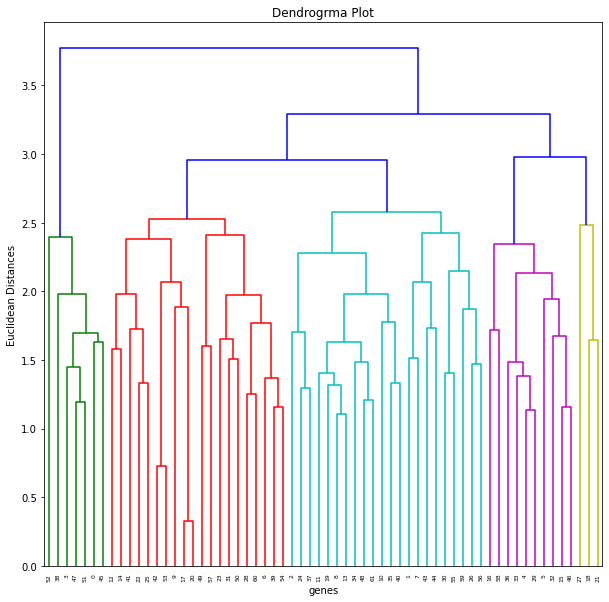

In [ ]:
import scipy.cluster.hierarchy as shc  
plt.figure(figsize=(10, 10)) 
dendro = shc.dendrogram(shc.linkage(crc_var2, method="complete"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("genes")  
plt.show()  


In [ ]:
stage = crc["Dukes Stage"]
lut = dict(zip(stage.unique(), "rbg"))
col_colors = stage.map(lut)

In [ ]:
crc_var= pd.DataFrame(crc_var2, columns=['117_at', '1405_i_at', '1438_at', '1552281_at', '1552309_a_at',
       '1552348_at', '1552349_a_at', '1552365_at', '1552502_s_at',
       '1552511_a_at', '1552519_at', '1552575_a_at', '1552742_at',
       '1552767_a_at', '1552797_s_at', '1552834_at', '1552870_s_at',
       '1553102_a_at', '1553296_at', '1553486_a_at', '1553589_a_at',
       '1553602_at', '1553613_s_at', '1553808_a_at', '1553828_at',
       '1553830_s_at', '1553970_s_at', '1553994_at', '1553995_a_at',
       '1554007_at', '1554018_at', '1554195_a_at', '1554242_a_at',
       '1554332_a_at', '1554436_a_at', '1554474_a_at', '1554679_a_at',
       '1554741_s_at', '1554897_s_at', '1554899_s_at', '213418_at'])
crc_var

117_at  1405_i_at   1438_at  1552281_at  1552309_a_at  1552348_at  \
0   0.286809   0.474139  0.501938    0.362058      0.300777    0.078037   
1   0.338509   0.592867  0.593176    0.616811      0.265941    0.072510   
2   0.121313   0.389280  1.000000    0.347229      0.217660    0.071840   
3   0.053846   0.820879  0.621560    0.339646      0.369835    0.131784   
4   0.259867   0.439417  0.303678    0.591447      0.711632    0.122218   
..       ...        ...       ...         ...           ...         ...   
57  0.090478   0.516515  0.300057    0.656717      0.386186    0.823233   
58  0.231602   0.424806  0.494949    0.660676      0.750131    0.000575   
59  0.719460   0.106874  0.306495    0.641802      0.078917    0.008187   
60  0.233014   0.590448  0.729823    0.672519      0.443204    0.469455   
61  0.035375   0.372163  0.703183    0.691180      0.281317    0.188924   

    1552349_a_at  1552365_at  1552502_s_at  1552511_a_at  ...  1554195_a_at  \
0       0.073592    0.887183      0.834186      0.050522  ...      0.562902   
1       0.017125    0.277276      0.314172      0.128806  ...      0.629476   
2       0.055498    0.849499      0.532177      0.021779  ...      0.090331   
3       0.079828    0.844792      0.837165      0.020964  ...      0.210600   
4       0.111742    0.468352      0.244478      0.034334  ...      0.596285   
..           ...         ...           ...           ...  ...           ...   
57      0.922114    0.353283      0.169065      0.503924  ...      0.249957   
58      0.060793    0.190912      0.080744      0.148677  ...      0.000000   
59      0.007182    0.221687      0.258110      0.415138  ...      0.104006   
60      0.332084    0.367516      0.207200      0.186262  ...      0.803254   
61      0.089558    0.410028      0.618831      0.050628  ...      0.073541   

    1554242_a_at  1554332_a_at  1554436_a_at  1554474_a_at  1554679_a_at  \
0       0.023494      0.300246      0.993336      0.197783      0.261895   
1       1.000000      0.135934      0.440364      0.356337      0.752605   
2       0.161707      0.938616      0.608133      0.618418      0.489194   
3       0.155093      0.865161      1.000000      0.338419      0.795522   
4       0.119066      0.346447      0.491981      0.700156      0.579253   
..           ...           ...           ...           ...           ...   
57      0.397222      0.434483      0.154706      0.335593      0.708066   
58      0.538654      0.513190      0.030957      0.897645      0.706431   
59      0.305349      0.344845      0.151394      0.224980      1.000000   
60      0.179225      0.305230      0.056528      0.422549      0.793218   
61      0.105710      0.655456      0.125040      0.248269      0.572232   

    1554741_s_at  1554897_s_at  1554899_s_at  213418_at  
0       0.301547      0.827361      0.463413   0.374128  
1       0.411258      0.361488      0.761268   0.472846  
2       0.202870      0.596529      0.656503   0.160178  
3       0.360805      0.930099      0.450454   0.075151  
4       0.700842      0.298820      0.883699   0.361645  
..           ...           ...           ...        ...  
57      0.353283      0.240995      0.628000   0.162254  
58      0.706942      0.000000      0.461070   0.326574  
59      0.457891      0.300646      0.923789   0.765626  
60      0.562986      0.239207      0.544951   0.335026  
61      0.123902      0.693827      0.230166   0.086853  

[62 rows x 41 columns]

In [ ]:

a = crc_var.copy()
a.loc[41] = crc["Dukes Stage"]
a
crc_var

117_at  1405_i_at   1438_at  1552281_at  1552309_a_at  1552348_at  \
0   0.286809   0.474139  0.501938    0.362058      0.300777    0.078037   
1   0.338509   0.592867  0.593176    0.616811      0.265941    0.072510   
2   0.121313   0.389280  1.000000    0.347229      0.217660    0.071840   
3   0.053846   0.820879  0.621560    0.339646      0.369835    0.131784   
4   0.259867   0.439417  0.303678    0.591447      0.711632    0.122218   
..       ...        ...       ...         ...           ...         ...   
57  0.090478   0.516515  0.300057    0.656717      0.386186    0.823233   
58  0.231602   0.424806  0.494949    0.660676      0.750131    0.000575   
59  0.719460   0.106874  0.306495    0.641802      0.078917    0.008187   
60  0.233014   0.590448  0.729823    0.672519      0.443204    0.469455   
61  0.035375   0.372163  0.703183    0.691180      0.281317    0.188924   

    1552349_a_at  1552365_at  1552502_s_at  1552511_a_at  ...  1554195_a_at  \
0       0.073592    0.887183      0.834186      0.050522  ...      0.562902   
1       0.017125    0.277276      0.314172      0.128806  ...      0.629476   
2       0.055498    0.849499      0.532177      0.021779  ...      0.090331   
3       0.079828    0.844792      0.837165      0.020964  ...      0.210600   
4       0.111742    0.468352      0.244478      0.034334  ...      0.596285   
..           ...         ...           ...           ...  ...           ...   
57      0.922114    0.353283      0.169065      0.503924  ...      0.249957   
58      0.060793    0.190912      0.080744      0.148677  ...      0.000000   
59      0.007182    0.221687      0.258110      0.415138  ...      0.104006   
60      0.332084    0.367516      0.207200      0.186262  ...      0.803254   
61      0.089558    0.410028      0.618831      0.050628  ...      0.073541   

    1554242_a_at  1554332_a_at  1554436_a_at  1554474_a_at  1554679_a_at  \
0       0.023494      0.300246      0.993336      0.197783      0.261895   
1       1.000000      0.135934      0.440364      0.356337      0.752605   
2       0.161707      0.938616      0.608133      0.618418      0.489194   
3       0.155093      0.865161      1.000000      0.338419      0.795522   
4       0.119066      0.346447      0.491981      0.700156      0.579253   
..           ...           ...           ...           ...           ...   
57      0.397222      0.434483      0.154706      0.335593      0.708066   
58      0.538654      0.513190      0.030957      0.897645      0.706431   
59      0.305349      0.344845      0.151394      0.224980      1.000000   
60      0.179225      0.305230      0.056528      0.422549      0.793218   
61      0.105710      0.655456      0.125040      0.248269      0.572232   

    1554741_s_at  1554897_s_at  1554899_s_at  213418_at  
0       0.301547      0.827361      0.463413   0.374128  
1       0.411258      0.361488      0.761268   0.472846  
2       0.202870      0.596529      0.656503   0.160178  
3       0.360805      0.930099      0.450454   0.075151  
4       0.700842      0.298820      0.883699   0.361645  
..           ...           ...           ...        ...  
57      0.353283      0.240995      0.628000   0.162254  
58      0.706942      0.000000      0.461070   0.326574  
59      0.457891      0.300646      0.923789   0.765626  
60      0.562986      0.239207      0.544951   0.335026  
61      0.123902      0.693827      0.230166   0.086853  

[62 rows x 41 columns]

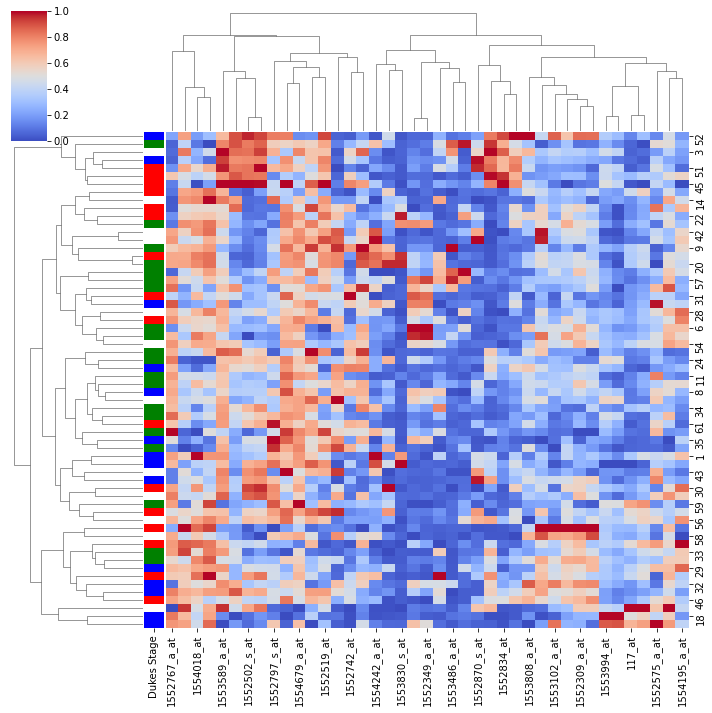

In [ ]:
# changing color of the map.
sns.clustermap(crc_var, figsize=(10, 10), method="complete", row_colors= col_colors, cmap="coolwarm")

In [ ]:
#training the hierarchical model on dataset  
from sklearn.cluster import KMeans  
km = KMeans(n_clusters=5)  
y_pred2= km.fit_predict(crc_var) 

In [ ]:
y_pred2

array([3, 2, 1, 3, 4, 4, 0, 2, 1, 0, 1, 2, 4, 1, 2, 2, 4, 0, 4, 2, 0, 4,
       0, 1, 1, 0, 2, 4, 2, 4, 2, 1, 0, 4, 1, 1, 4, 1, 3, 0, 1, 2, 0, 2,
       3, 3, 2, 3, 2, 2, 1, 3, 3, 2, 0, 2, 2, 0, 0, 2, 2, 1], dtype=int32)

In [ ]:
y_pred2== 0,0

(array([False, False, False, False, False, False,  True, False, False,
         True, False, False, False, False, False, False, False,  True,
        False, False,  True, False,  True, False, False,  True, False,
        False, False, False, False, False,  True, False, False, False,
        False, False, False,  True, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
         True, False, False,  True,  True, False, False, False]), 0)

In [ ]:
crc_var

117_at  1405_i_at   1438_at  1552281_at  1552309_a_at  1552348_at  \
0   0.286809   0.474139  0.501938    0.362058      0.300777    0.078037   
1   0.338509   0.592867  0.593176    0.616811      0.265941    0.072510   
2   0.121313   0.389280  1.000000    0.347229      0.217660    0.071840   
3   0.053846   0.820879  0.621560    0.339646      0.369835    0.131784   
4   0.259867   0.439417  0.303678    0.591447      0.711632    0.122218   
..       ...        ...       ...         ...           ...         ...   
57  0.090478   0.516515  0.300057    0.656717      0.386186    0.823233   
58  0.231602   0.424806  0.494949    0.660676      0.750131    0.000575   
59  0.719460   0.106874  0.306495    0.641802      0.078917    0.008187   
60  0.233014   0.590448  0.729823    0.672519      0.443204    0.469455   
61  0.035375   0.372163  0.703183    0.691180      0.281317    0.188924   

    1552349_a_at  1552365_at  1552502_s_at  1552511_a_at  ...  1554195_a_at  \
0       0.073592    0.887183      0.834186      0.050522  ...      0.562902   
1       0.017125    0.277276      0.314172      0.128806  ...      0.629476   
2       0.055498    0.849499      0.532177      0.021779  ...      0.090331   
3       0.079828    0.844792      0.837165      0.020964  ...      0.210600   
4       0.111742    0.468352      0.244478      0.034334  ...      0.596285   
..           ...         ...           ...           ...  ...           ...   
57      0.922114    0.353283      0.169065      0.503924  ...      0.249957   
58      0.060793    0.190912      0.080744      0.148677  ...      0.000000   
59      0.007182    0.221687      0.258110      0.415138  ...      0.104006   
60      0.332084    0.367516      0.207200      0.186262  ...      0.803254   
61      0.089558    0.410028      0.618831      0.050628  ...      0.073541   

    1554242_a_at  1554332_a_at  1554436_a_at  1554474_a_at  1554679_a_at  \
0       0.023494      0.300246      0.993336      0.197783      0.261895   
1       1.000000      0.135934      0.440364      0.356337      0.752605   
2       0.161707      0.938616      0.608133      0.618418      0.489194   
3       0.155093      0.865161      1.000000      0.338419      0.795522   
4       0.119066      0.346447      0.491981      0.700156      0.579253   
..           ...           ...           ...           ...           ...   
57      0.397222      0.434483      0.154706      0.335593      0.708066   
58      0.538654      0.513190      0.030957      0.897645      0.706431   
59      0.305349      0.344845      0.151394      0.224980      1.000000   
60      0.179225      0.305230      0.056528      0.422549      0.793218   
61      0.105710      0.655456      0.125040      0.248269      0.572232   

    1554741_s_at  1554897_s_at  1554899_s_at  213418_at  
0       0.301547      0.827361      0.463413   0.374128  
1       0.411258      0.361488      0.761268   0.472846  
2       0.202870      0.596529      0.656503   0.160178  
3       0.360805      0.930099      0.450454   0.075151  
4       0.700842      0.298820      0.883699   0.361645  
..           ...           ...           ...        ...  
57      0.353283      0.240995      0.628000   0.162254  
58      0.706942      0.000000      0.461070   0.326574  
59      0.457891      0.300646      0.923789   0.765626  
60      0.562986      0.239207      0.544951   0.335026  
61      0.123902      0.693827      0.230166   0.086853  

[62 rows x 41 columns]

In [ ]:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(crc_var) 

In [ ]:
y_pred

array([2, 2, 2, 3, 0, 2, 0, 2, 4, 1, 4, 4, 0, 4, 0, 2, 0, 1, 0, 4, 1, 0,
       1, 4, 4, 1, 2, 0, 4, 0, 2, 4, 0, 0, 4, 4, 0, 4, 3, 0, 4, 1, 1, 2,
       2, 3, 2, 3, 4, 0, 4, 3, 3, 1, 0, 2, 2, 0, 0, 2, 4, 4])

In [ ]:
zero = crc_var[ y_pred == 0] 
one = crc_var[ y_pred ==1 ]
two = crc_var[ y_pred == 2 ]
three = crc_var[ y_pred == 3]
four = crc_var[y_pred == 4]


In [ ]:
print(zero.shape)
print(one.shape)
print(two.shape)
print(three.shape)
print(four.shape)


(17, 41)
(8, 41)
(14, 41)
(6, 41)
(17, 41)


In [ ]:
crc_new = crc_var.copy()
crc_new["Clusters"] = y_pred
crc_new

117_at  1405_i_at   1438_at  1552281_at  1552309_a_at  1552348_at  \
0   0.286809   0.474139  0.501938    0.362058      0.300777    0.078037   
1   0.338509   0.592867  0.593176    0.616811      0.265941    0.072510   
2   0.121313   0.389280  1.000000    0.347229      0.217660    0.071840   
3   0.053846   0.820879  0.621560    0.339646      0.369835    0.131784   
4   0.259867   0.439417  0.303678    0.591447      0.711632    0.122218   
..       ...        ...       ...         ...           ...         ...   
57  0.090478   0.516515  0.300057    0.656717      0.386186    0.823233   
58  0.231602   0.424806  0.494949    0.660676      0.750131    0.000575   
59  0.719460   0.106874  0.306495    0.641802      0.078917    0.008187   
60  0.233014   0.590448  0.729823    0.672519      0.443204    0.469455   
61  0.035375   0.372163  0.703183    0.691180      0.281317    0.188924   

    1552349_a_at  1552365_at  1552502_s_at  1552511_a_at  ...  1554242_a_at  \
0       0.073592    0.887183      0.834186      0.050522  ...      0.023494   
1       0.017125    0.277276      0.314172      0.128806  ...      1.000000   
2       0.055498    0.849499      0.532177      0.021779  ...      0.161707   
3       0.079828    0.844792      0.837165      0.020964  ...      0.155093   
4       0.111742    0.468352      0.244478      0.034334  ...      0.119066   
..           ...         ...           ...           ...  ...           ...   
57      0.922114    0.353283      0.169065      0.503924  ...      0.397222   
58      0.060793    0.190912      0.080744      0.148677  ...      0.538654   
59      0.007182    0.221687      0.258110      0.415138  ...      0.305349   
60      0.332084    0.367516      0.207200      0.186262  ...      0.179225   
61      0.089558    0.410028      0.618831      0.050628  ...      0.105710   

    1554332_a_at  1554436_a_at  1554474_a_at  1554679_a_at  1554741_s_at  \
0       0.300246      0.993336      0.197783      0.261895      0.301547   
1       0.135934      0.440364      0.356337      0.752605      0.411258   
2       0.938616      0.608133      0.618418      0.489194      0.202870   
3       0.865161      1.000000      0.338419      0.795522      0.360805   
4       0.346447      0.491981      0.700156      0.579253      0.700842   
..           ...           ...           ...           ...           ...   
57      0.434483      0.154706      0.335593      0.708066      0.353283   
58      0.513190      0.030957      0.897645      0.706431      0.706942   
59      0.344845      0.151394      0.224980      1.000000      0.457891   
60      0.305230      0.056528      0.422549      0.793218      0.562986   
61      0.655456      0.125040      0.248269      0.572232      0.123902   

    1554897_s_at  1554899_s_at  213418_at  Clusters  
0       0.827361      0.463413   0.374128         2  
1       0.361488      0.761268   0.472846         2  
2       0.596529      0.656503   0.160178         2  
3       0.930099      0.450454   0.075151         3  
4       0.298820      0.883699   0.361645         0  
..           ...           ...        ...       ...  
57      0.240995      0.628000   0.162254         0  
58      0.000000      0.461070   0.326574         0  
59      0.300646      0.923789   0.765626         2  
60      0.239207      0.544951   0.335026         4  
61      0.693827      0.230166   0.086853         4  

[62 rows x 42 columns]

In [ ]:


#splitting dataset into a training set and test set

from sklearn.model_selection import train_test_split



X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(crc_var, crc_new["Clusters"], test_size=0.2, random_state = 0)

In [ ]:




#fitting logistic Regression to training set

from sklearn.linear_model import LogisticRegression

classifier1 = LogisticRegression(random_state = 0)

classifier1.fit(X_train_lr, y_train_lr)


classifier1.score(X_test_lr,y_test_lr)

0.6923076923076923

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

#{Decision Tree Model}
clf = DecisionTreeClassifier(random_state = 0)
clf = clf.fit(X_train_lr, y_train_lr)
print(clf.score(X_test_lr,y_test_lr))



0.7692307692307693


In [ ]:
#{K Neighbors Classifier}
knn = KNeighborsClassifier()
knn.fit(X_train_lr, y_train_lr)
print( knn.score(X_test_lr,y_test_lr))



0.7692307692307693


In [ ]:
#{using MLPClassifier}
mlpc = MLPClassifier(random_state = 0)
mlpc.fit(X_train_lr, y_train_lr)
print(mlpc.score(X_test_lr,y_test_lr))


0.6153846153846154


In [ ]:
#{using RandomForestClassifier}
rfor = RandomForestClassifier(random_state = 0)
rfor.fit(X_train_lr, y_train_lr)
print(rfor.score(X_test_lr,y_test_lr))

1.0


In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
# Calcualte the Fisher Score (chi2) between each feature and target
fisher_score = chi2(crc_var, crc_new["Clusters"])
fisher_score

(array([ 2.62738118,  2.39927301,  2.15827746,  2.28946955,  1.81648245,
         3.78815834,  3.65509149,  3.61058286,  8.46689873,  2.02879571,
         3.71621923,  0.40783151,  2.1075811 ,  3.12129007,  1.5273096 ,
        12.82571275,  5.01923252,  2.38033778,  0.3224026 ,  4.36015683,
         1.15833008,  1.08792403,  1.55586902,  0.77785384,  5.85716812,
        11.09794982,  6.07600745,  1.34089353,  1.92918012,  1.57978973,
         3.12374696,  1.51584183,  3.96604025,  1.53800224, 11.23541419,
         2.07461724,  0.7140169 ,  1.18060159,  7.2005339 ,  3.4718589 ,
         3.03357348]),
 array([0.62198041, 0.66275865, 0.70667459, 0.68268695, 0.76946545,
        0.43543394, 0.45469126, 0.46126434, 0.07589695, 0.73046239,
        0.44577133, 0.98183071, 0.71597974, 0.53773692, 0.82179315,
        0.01215955, 0.28532981, 0.66618343, 0.98832249, 0.35945274,
        0.88491048, 0.89618343, 0.81670101, 0.94139217, 0.21007199,
        0.02548497, 0.19354344, 0.85440014, 0.7487827

In [ ]:
p_values = pd.Series(fisher_score[1])
p_values.index =crc_var.columns
p_values.sort_values(ascending=False)

1553296_at      0.988322
1552575_a_at    0.981831
1554679_a_at    0.949589
1553808_a_at    0.941392
1553602_at      0.896183
1553589_a_at    0.884910
1554741_s_at    0.881282
1553994_at      0.854400
1554195_a_at    0.823832
1552797_s_at    0.821793
1554332_a_at    0.819889
1553613_s_at    0.816701
1554007_at      0.812420
1552309_a_at    0.769465
1553995_a_at    0.748783
1552511_a_at    0.730462
1554474_a_at    0.722037
1552742_at      0.715980
1438_at         0.706675
1552281_at      0.682687
1553102_a_at    0.666183
1405_i_at       0.662759
117_at          0.621980
213418_at       0.552223
1552767_a_at    0.537737
1554018_at      0.537334
1554899_s_at    0.482170
1552365_at      0.461264
1552349_a_at    0.454691
1552519_at      0.445771
1552348_at      0.435434
1554242_a_at    0.410621
1553486_a_at    0.359453
1552870_s_at    0.285330
1553828_at      0.210072
1553970_s_at    0.193543
1554897_s_at    0.125663
1552502_s_at    0.075897
1553830_s_at    0.025485
1554436_a_at    0.024042


In [ ]:
crc_feat = crc_var.drop(["1552575_a_at", "1554741_s_at","1554007_at","1554195_a_at","1552309_a_at","1553589_a_at","1553808_a_at","1554679_a_at","1553613_s_at"  ],  axis=1)

In [ ]:
crc_feat

117_at  1405_i_at   1438_at  1552281_at  1552348_at  1552349_a_at  \
0   0.286809   0.474139  0.501938    0.362058    0.078037      0.073592   
1   0.338509   0.592867  0.593176    0.616811    0.072510      0.017125   
2   0.121313   0.389280  1.000000    0.347229    0.071840      0.055498   
3   0.053846   0.820879  0.621560    0.339646    0.131784      0.079828   
4   0.259867   0.439417  0.303678    0.591447    0.122218      0.111742   
..       ...        ...       ...         ...         ...           ...   
57  0.090478   0.516515  0.300057    0.656717    0.823233      0.922114   
58  0.231602   0.424806  0.494949    0.660676    0.000575      0.060793   
59  0.719460   0.106874  0.306495    0.641802    0.008187      0.007182   
60  0.233014   0.590448  0.729823    0.672519    0.469455      0.332084   
61  0.035375   0.372163  0.703183    0.691180    0.188924      0.089558   

    1552365_at  1552502_s_at  1552511_a_at  1552519_at  ...  1553994_at  \
0     0.887183      0.834186      0.050522    0.618087  ...    0.436928   
1     0.277276      0.314172      0.128806    0.439086  ...    0.247569   
2     0.849499      0.532177      0.021779    0.780383  ...    0.292896   
3     0.844792      0.837165      0.020964    0.630823  ...    0.459220   
4     0.468352      0.244478      0.034334    0.449952  ...    0.381238   
..         ...           ...           ...         ...  ...         ...   
57    0.353283      0.169065      0.503924    0.581239  ...    0.277145   
58    0.190912      0.080744      0.148677    0.094720  ...    0.364974   
59    0.221687      0.258110      0.415138    0.653185  ...    0.500072   
60    0.367516      0.207200      0.186262    0.685550  ...    0.333928   
61    0.410028      0.618831      0.050628    0.514958  ...    0.365726   

    1553995_a_at  1554018_at  1554242_a_at  1554332_a_at  1554436_a_at  \
0       0.316754    0.390559      0.023494      0.300246      0.993336   
1       0.149106    1.000000      1.000000      0.135934      0.440364   
2       0.207728    0.424316      0.161707      0.938616      0.608133   
3       0.406133    0.266485      0.155093      0.865161      1.000000   
4       0.307760    0.792475      0.119066      0.346447      0.491981   
..           ...         ...           ...           ...           ...   
57      0.154534    0.445302      0.397222      0.434483      0.154706   
58      0.253424    0.604774      0.538654      0.513190      0.030957   
59      0.493423    0.519013      0.305349      0.344845      0.151394   
60      0.295176    0.556071      0.179225      0.305230      0.056528   
61      0.254322    0.155610      0.105710      0.655456      0.125040   

    1554474_a_at  1554897_s_at  1554899_s_at  213418_at  
0       0.197783      0.827361      0.463413   0.374128  
1       0.356337      0.361488      0.761268   0.472846  
2       0.618418      0.596529      0.656503   0.160178  
3       0.338419      0.930099      0.450454   0.075151  
4       0.700156      0.298820      0.883699   0.361645  
..           ...           ...           ...        ...  
57      0.335593      0.240995      0.628000   0.162254  
58      0.897645      0.000000      0.461070   0.326574  
59      0.224980      0.300646      0.923789   0.765626  
60      0.422549      0.239207      0.544951   0.335026  
61      0.248269      0.693827      0.230166   0.086853  

[62 rows x 32 columns]

In [ ]:
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(crc_feat, crc_new["Clusters"], test_size=0.2, random_state = 0)

In [ ]:

classifier2 = LogisticRegression(random_state = 0)

classifier2.fit(X_train_ft, y_train_ft)


classifier2.score(X_test_ft,y_test_ft)

0.6923076923076923

In [ ]:
#{Decision Tree Model}
clf2 = DecisionTreeClassifier(random_state = 0)
clf2 = clf2.fit(X_train_ft, y_train_ft)
print(clf2.score(X_test_ft,y_test_ft))



0.6923076923076923


In [ ]:
#{K Neighbors Classifier}
knn2 = KNeighborsClassifier()
knn2.fit(X_train_ft, y_train_ft)
print( knn2.score(X_test_ft,y_test_ft))


0.8461538461538461


In [ ]:
#{using MLPClassifier}
mlpc2 = MLPClassifier(random_state = 0)
mlpc2.fit(X_train_ft, y_train_ft)
print(mlpc2.score(X_test_ft,y_test_ft))

0.8461538461538461


In [ ]:
#{using RandomForestClassifier}
rfor2 = RandomForestClassifier(random_state = 0)
rfor2.fit(X_train_ft, y_train_ft)
print(rfor2.score(X_test_ft,y_test_ft))

0.8461538461538461


In [ ]:
crc_new

117_at  1405_i_at   1438_at  1552281_at  1552309_a_at  1552348_at  \
0   0.286809   0.474139  0.501938    0.362058      0.300777    0.078037   
1   0.338509   0.592867  0.593176    0.616811      0.265941    0.072510   
2   0.121313   0.389280  1.000000    0.347229      0.217660    0.071840   
3   0.053846   0.820879  0.621560    0.339646      0.369835    0.131784   
4   0.259867   0.439417  0.303678    0.591447      0.711632    0.122218   
..       ...        ...       ...         ...           ...         ...   
57  0.090478   0.516515  0.300057    0.656717      0.386186    0.823233   
58  0.231602   0.424806  0.494949    0.660676      0.750131    0.000575   
59  0.719460   0.106874  0.306495    0.641802      0.078917    0.008187   
60  0.233014   0.590448  0.729823    0.672519      0.443204    0.469455   
61  0.035375   0.372163  0.703183    0.691180      0.281317    0.188924   

    1552349_a_at  1552365_at  1552502_s_at  1552511_a_at  ...  1554242_a_at  \
0       0.073592    0.887183      0.834186      0.050522  ...      0.023494   
1       0.017125    0.277276      0.314172      0.128806  ...      1.000000   
2       0.055498    0.849499      0.532177      0.021779  ...      0.161707   
3       0.079828    0.844792      0.837165      0.020964  ...      0.155093   
4       0.111742    0.468352      0.244478      0.034334  ...      0.119066   
..           ...         ...           ...           ...  ...           ...   
57      0.922114    0.353283      0.169065      0.503924  ...      0.397222   
58      0.060793    0.190912      0.080744      0.148677  ...      0.538654   
59      0.007182    0.221687      0.258110      0.415138  ...      0.305349   
60      0.332084    0.367516      0.207200      0.186262  ...      0.179225   
61      0.089558    0.410028      0.618831      0.050628  ...      0.105710   

    1554332_a_at  1554436_a_at  1554474_a_at  1554679_a_at  1554741_s_at  \
0       0.300246      0.993336      0.197783      0.261895      0.301547   
1       0.135934      0.440364      0.356337      0.752605      0.411258   
2       0.938616      0.608133      0.618418      0.489194      0.202870   
3       0.865161      1.000000      0.338419      0.795522      0.360805   
4       0.346447      0.491981      0.700156      0.579253      0.700842   
..           ...           ...           ...           ...           ...   
57      0.434483      0.154706      0.335593      0.708066      0.353283   
58      0.513190      0.030957      0.897645      0.706431      0.706942   
59      0.344845      0.151394      0.224980      1.000000      0.457891   
60      0.305230      0.056528      0.422549      0.793218      0.562986   
61      0.655456      0.125040      0.248269      0.572232      0.123902   

    1554897_s_at  1554899_s_at  213418_at  Clusters  
0       0.827361      0.463413   0.374128         2  
1       0.361488      0.761268   0.472846         2  
2       0.596529      0.656503   0.160178         2  
3       0.930099      0.450454   0.075151         3  
4       0.298820      0.883699   0.361645         0  
..           ...           ...        ...       ...  
57      0.240995      0.628000   0.162254         0  
58      0.000000      0.461070   0.326574         0  
59      0.300646      0.923789   0.765626         2  
60      0.239207      0.544951   0.335026         4  
61      0.693827      0.230166   0.086853         4  

[62 rows x 42 columns]

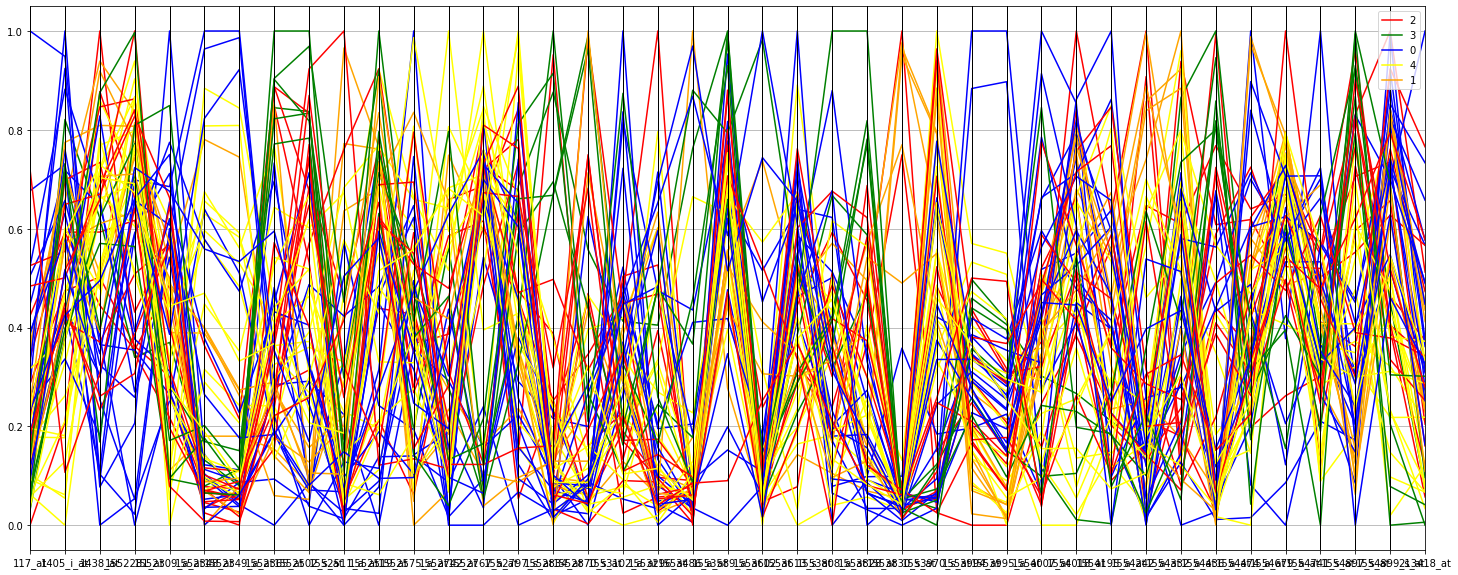

In [ ]:
colors = ['red','green','blue','yellow','orange']
plt.rcParams["figure.figsize"] = (25, 10)
pd.plotting.parallel_coordinates(crc_new, "Clusters", color=colors)


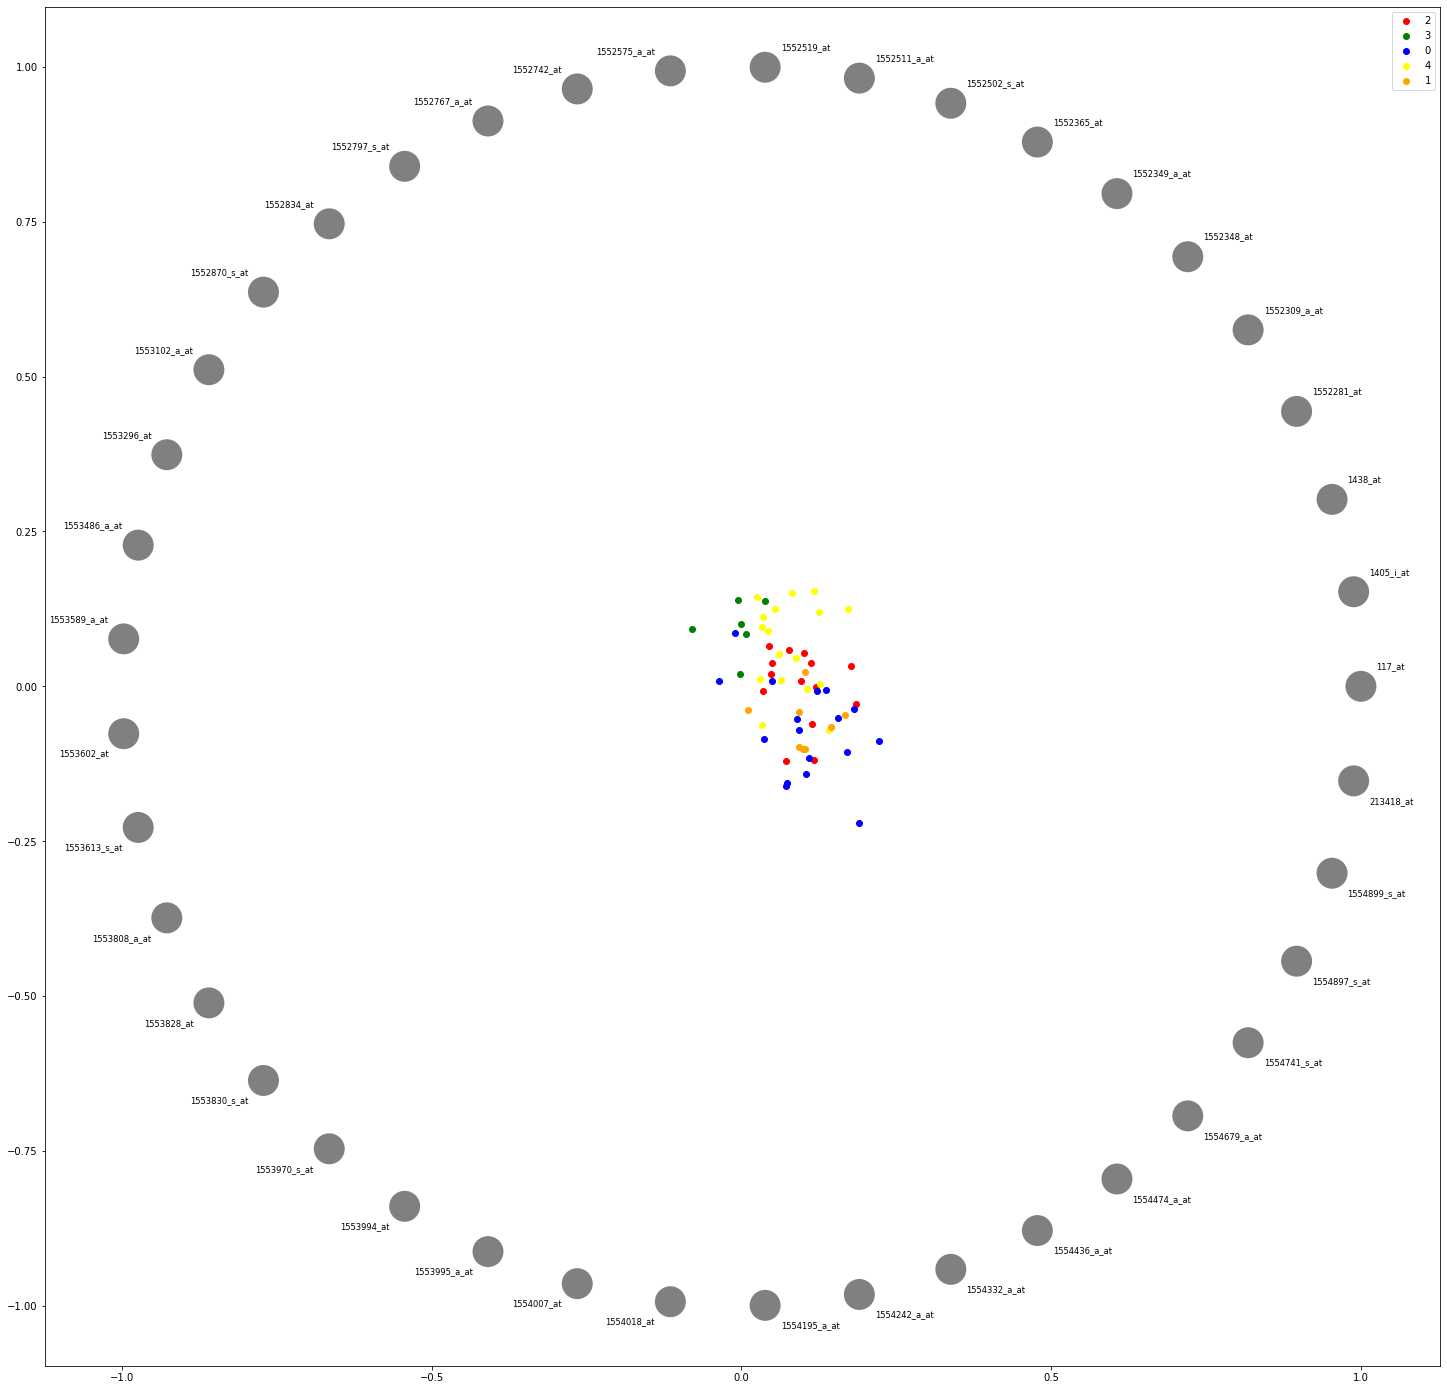

In [ ]:

plt.rcParams["figure.figsize"] = (25, 25)
pd.plotting.radviz(crc_new, 'Clusters', color=colors)


In [ ]:
imp=crc_new[["1554242_a_at","1553486_a_at","1553828_at","1554897_s_at","1553970_s_at","1552502_s_at","1553830_s_at","1552834_at","1554436_a_at","Clusters"]]
imp

1554242_a_at  1553486_a_at  1553828_at  1554897_s_at  1553970_s_at  \
0       0.023494      0.073884    0.687292      0.827361      0.059252   
1       1.000000      0.060812    0.367712      0.361488      0.149109   
2       0.161707      0.090190    0.121223      0.596529      0.051637   
3       0.155093      0.762407    0.587546      0.930099      0.033717   
4       0.119066      0.029162    0.353101      0.298820      0.421487   
..           ...           ...         ...           ...           ...   
57      0.397222      0.969466    0.174755      0.240995      0.447220   
58      0.538654      0.052144    0.000000      0.000000      0.777051   
59      0.305349      0.085227    0.080527      0.300646      0.257438   
60      0.179225      0.099164    0.082561      0.239207      0.644349   
61      0.105710      0.050680    0.216262      0.693827      0.459561   

    1552502_s_at  1553830_s_at  1552834_at  1554436_a_at  Clusters  
0       0.834186      0.034566    0.951905      0.993336         2  
1       0.314172      0.749324    0.057778      0.440364         2  
2       0.532177      0.064173    0.252977      0.608133         2  
3       0.837165      0.056033    0.876298      1.000000         3  
4       0.244478      0.037080    0.216010      0.491981         0  
..           ...           ...         ...           ...       ...  
57      0.169065      0.032795    0.101305      0.154706         0  
58      0.080744      0.062189    0.028888      0.030957         0  
59      0.258110      0.061373    0.061458      0.151394         2  
60      0.207200      0.042011    0.086269      0.056528         4  
61      0.618831      0.038423    0.145525      0.125040         4  

[62 rows x 10 columns]

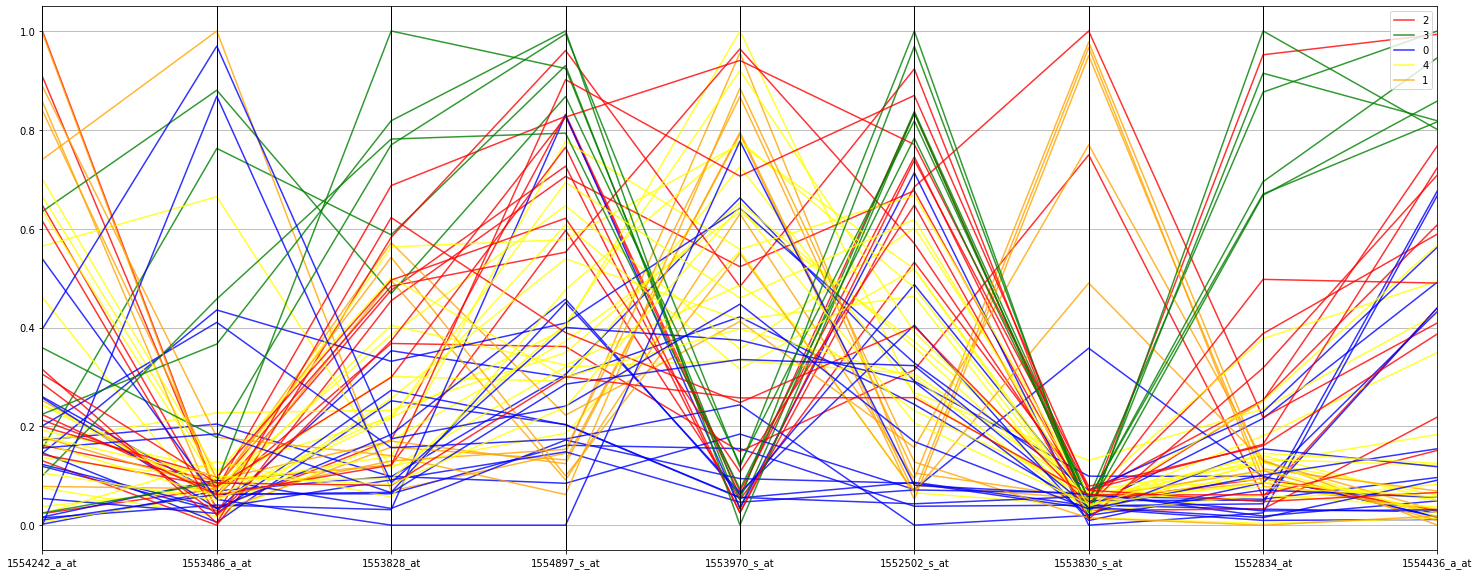

In [ ]:
plt.rcParams["figure.figsize"] = (25, 10)
pd.plotting.parallel_coordinates(imp,"Clusters", color=colors, alpha=0.8)

In [ ]:
len(imp)

62

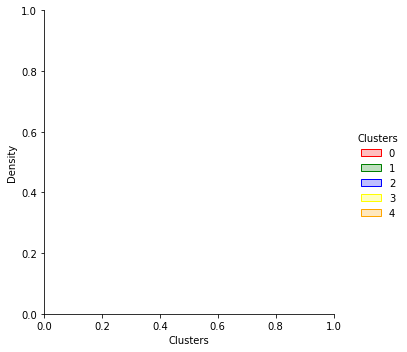

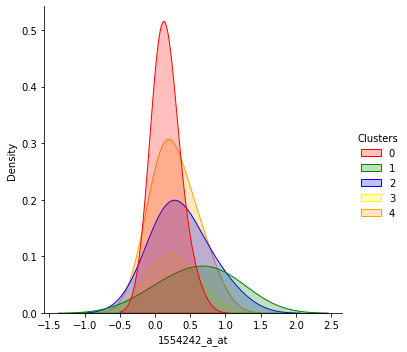

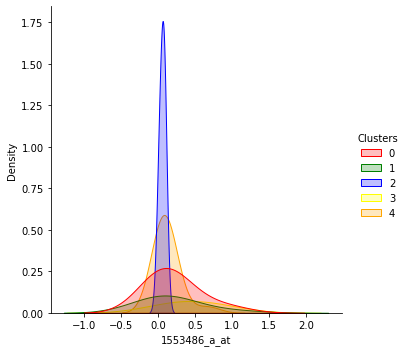

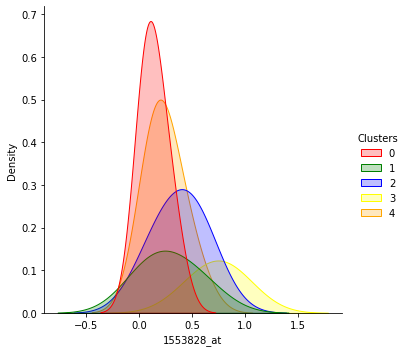

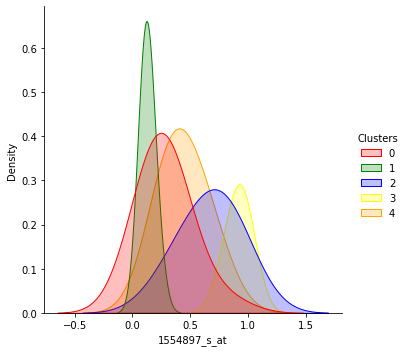

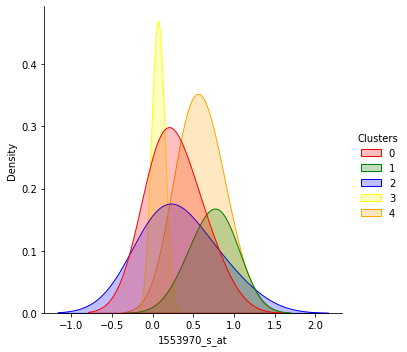

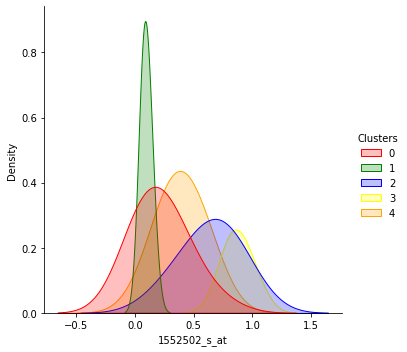

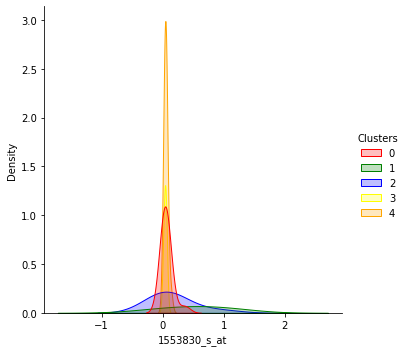

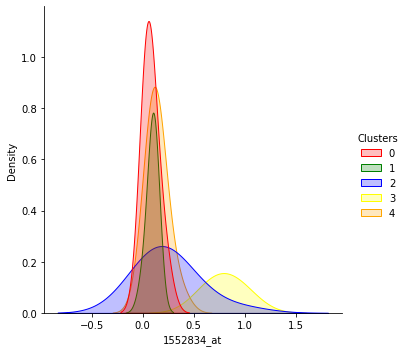

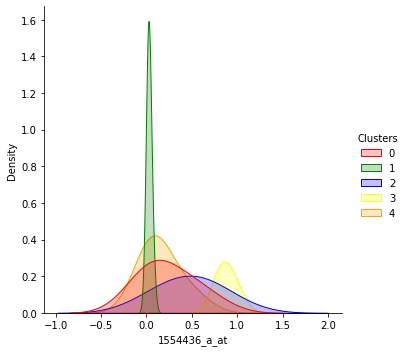

In [ ]:
for i in range(10):
 sns.displot(x=imp.iloc[:,i-1], hue=imp["Clusters"], palette=colors, kind="kde", fill=True, bw_adjust=2)
 plt.show()

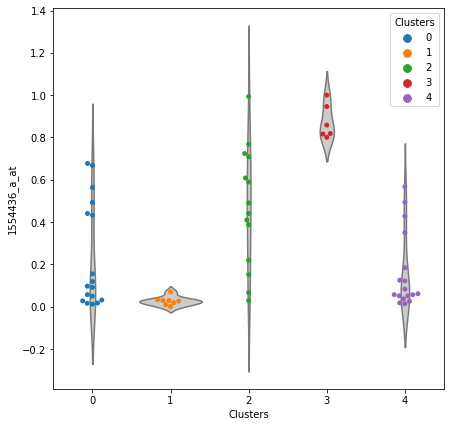

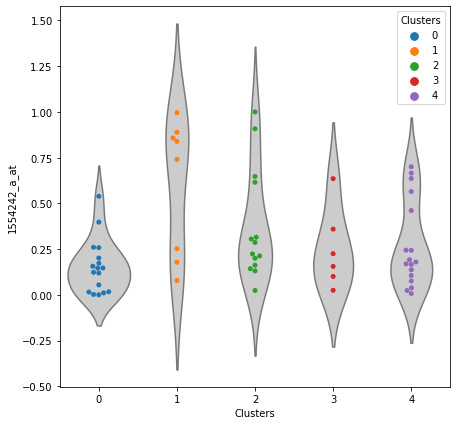

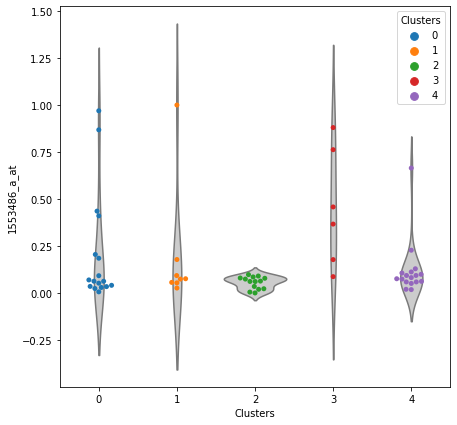

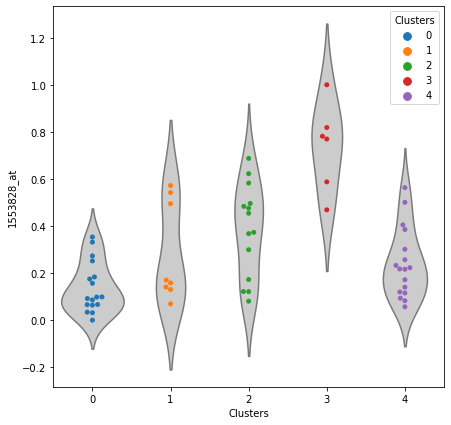

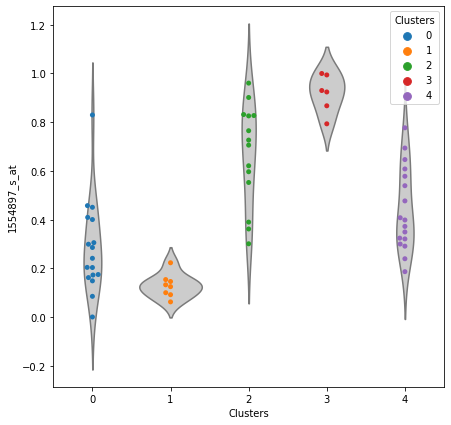

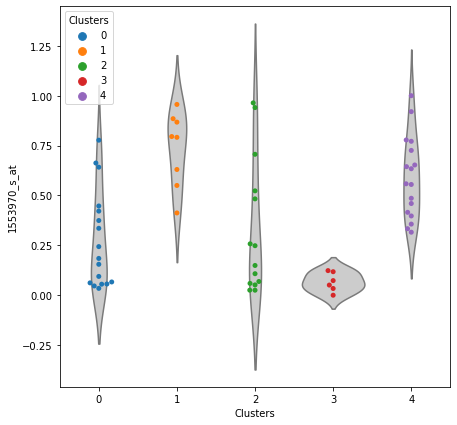

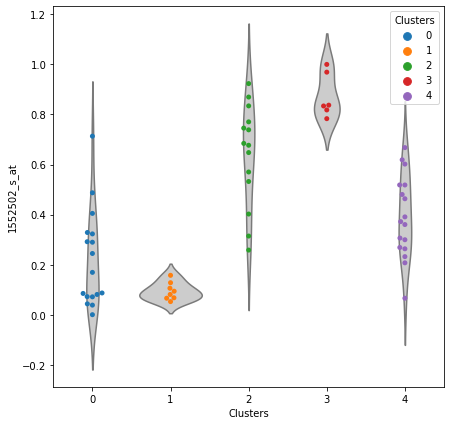

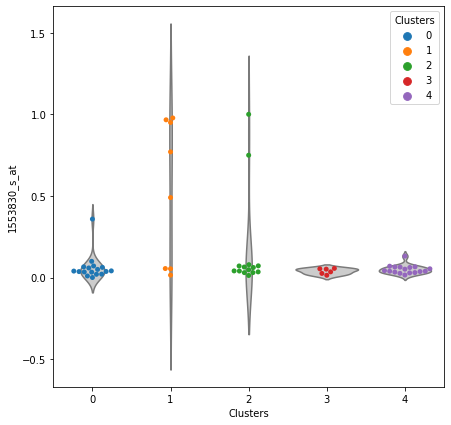

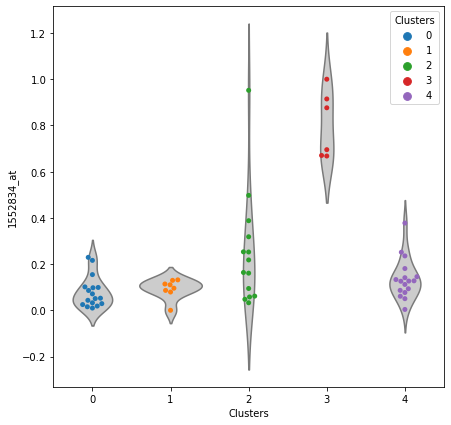

In [ ]:
plt.rcParams["figure.figsize"] = (7, 7)
imp_feat=["1554242_a_at","1553486_a_at","1553828_at","1554897_s_at","1553970_s_at","1552502_s_at","1553830_s_at","1552834_at","1554436_a_at"]
for i in range(len(imp_feat)):
 sns.violinplot(crc_new["Clusters"],crc_new[imp_feat[i-1]],inner=None, color=".8")
 sns.swarmplot(crc_new["Clusters"],crc_new[imp_feat[i-1]],hue=crc_new['Clusters'])
 plt.show()

In [ ]:
crc_new

117_at  1405_i_at   1438_at  1552281_at  1552309_a_at  1552348_at  \
0   0.286809   0.474139  0.501938    0.362058      0.300777    0.078037   
1   0.338509   0.592867  0.593176    0.616811      0.265941    0.072510   
2   0.121313   0.389280  1.000000    0.347229      0.217660    0.071840   
3   0.053846   0.820879  0.621560    0.339646      0.369835    0.131784   
4   0.259867   0.439417  0.303678    0.591447      0.711632    0.122218   
..       ...        ...       ...         ...           ...         ...   
57  0.090478   0.516515  0.300057    0.656717      0.386186    0.823233   
58  0.231602   0.424806  0.494949    0.660676      0.750131    0.000575   
59  0.719460   0.106874  0.306495    0.641802      0.078917    0.008187   
60  0.233014   0.590448  0.729823    0.672519      0.443204    0.469455   
61  0.035375   0.372163  0.703183    0.691180      0.281317    0.188924   

    1552349_a_at  1552365_at  1552502_s_at  1552511_a_at  ...  1554242_a_at  \
0       0.073592    0.887183      0.834186      0.050522  ...      0.023494   
1       0.017125    0.277276      0.314172      0.128806  ...      1.000000   
2       0.055498    0.849499      0.532177      0.021779  ...      0.161707   
3       0.079828    0.844792      0.837165      0.020964  ...      0.155093   
4       0.111742    0.468352      0.244478      0.034334  ...      0.119066   
..           ...         ...           ...           ...  ...           ...   
57      0.922114    0.353283      0.169065      0.503924  ...      0.397222   
58      0.060793    0.190912      0.080744      0.148677  ...      0.538654   
59      0.007182    0.221687      0.258110      0.415138  ...      0.305349   
60      0.332084    0.367516      0.207200      0.186262  ...      0.179225   
61      0.089558    0.410028      0.618831      0.050628  ...      0.105710   

    1554332_a_at  1554436_a_at  1554474_a_at  1554679_a_at  1554741_s_at  \
0       0.300246      0.993336      0.197783      0.261895      0.301547   
1       0.135934      0.440364      0.356337      0.752605      0.411258   
2       0.938616      0.608133      0.618418      0.489194      0.202870   
3       0.865161      1.000000      0.338419      0.795522      0.360805   
4       0.346447      0.491981      0.700156      0.579253      0.700842   
..           ...           ...           ...           ...           ...   
57      0.434483      0.154706      0.335593      0.708066      0.353283   
58      0.513190      0.030957      0.897645      0.706431      0.706942   
59      0.344845      0.151394      0.224980      1.000000      0.457891   
60      0.305230      0.056528      0.422549      0.793218      0.562986   
61      0.655456      0.125040      0.248269      0.572232      0.123902   

    1554897_s_at  1554899_s_at  213418_at  Clusters  
0       0.827361      0.463413   0.374128         2  
1       0.361488      0.761268   0.472846         2  
2       0.596529      0.656503   0.160178         2  
3       0.930099      0.450454   0.075151         3  
4       0.298820      0.883699   0.361645         0  
..           ...           ...        ...       ...  
57      0.240995      0.628000   0.162254         0  
58      0.000000      0.461070   0.326574         0  
59      0.300646      0.923789   0.765626         2  
60      0.239207      0.544951   0.335026         4  
61      0.693827      0.230166   0.086853         4  

[62 rows x 42 columns]

In [ ]:
from sklearn.manifold import MDS


mds = MDS(2,random_state=0)
X_2d = mds.fit_transform(crc_new.drop(["Clusters"], axis="columns"))

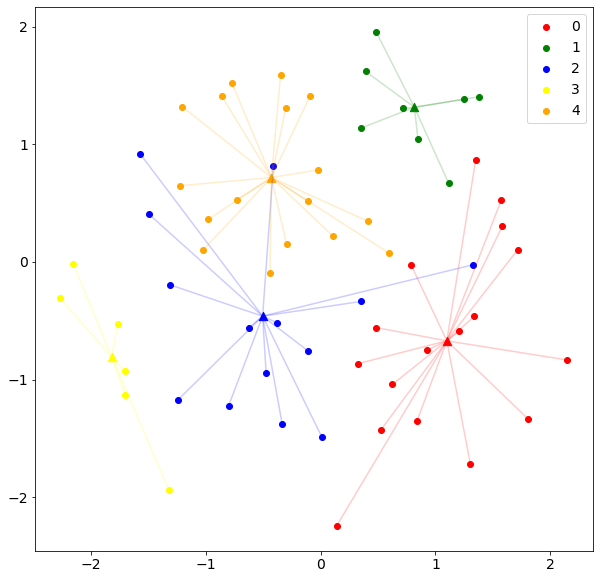

In [ ]:
colors = ['red','green','blue','yellow','orange']
label = [0,1,2,3,4]
plt.rcParams['figure.figsize'] = [10, 10]
plt.rc('font', size=14)
for i in np.unique(crc_new.Clusters):
  subset = X_2d[crc_new.Clusters == i]
  
  x = [row[0] for row in subset]
  y = [row[1] for row in subset]
  cen_x = sum(x) / len(x) 
  cen_y = sum(y) / len(y)
  plt.scatter(x,y,c=colors[i], label=label[i], marker="o")
  plt.scatter(cen_x,cen_y,c=colors[i], marker="^", s=70)
  # plot lines
  for j in range(len(x)):
    xj = [x[j], cen_x]
    yj = [y[j], cen_y]
    plt.plot(xj, yj, c=colors[i], alpha=0.2)
plt.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
data = crc_new.drop(["Clusters"], axis="columns")
pca = PCA()
pca1= pca.fit(data)
x_pca = pca.transform(data)
  
x_pca.shape

(62, 41)

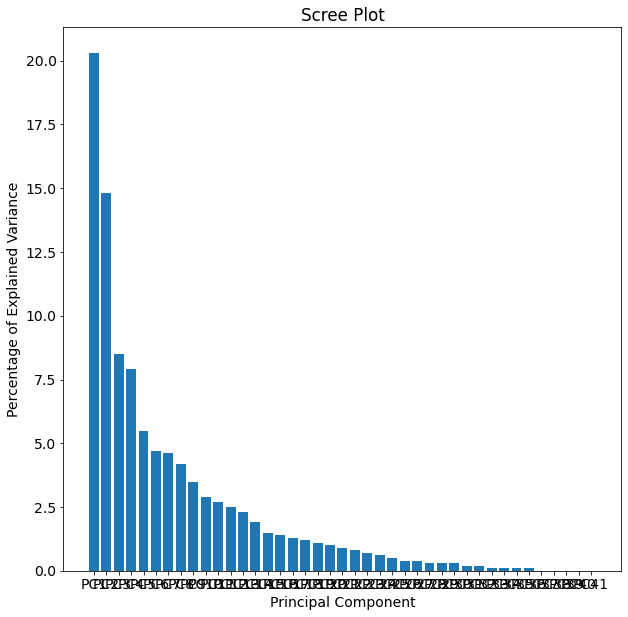

In [ ]:
per_var = np.round(pca1.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Text(0, 0.5, 'Second Principal Component')

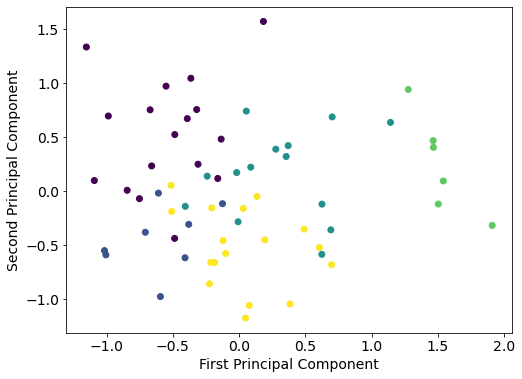

In [ ]:
# giving a larger plot
plt.figure(figsize =(8, 6))
  
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = crc_new['Clusters'])
  
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

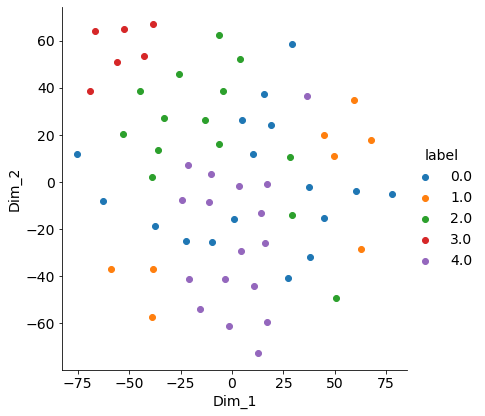

In [ ]:
from sklearn.manifold import TSNE

 
model = TSNE(n_components = 2, random_state = 0)
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000
 
tsne_data = model.fit_transform(data)
 
# creating a new data frame which
# help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, crc_new["Clusters"])).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))
 
# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue ="label", size = 6).map(
       plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 
plt.show()

In [ ]:
crc_new.columns


Index(['117_at', '1405_i_at', '1438_at', '1552281_at', '1552309_a_at',
       '1552348_at', '1552349_a_at', '1552365_at', '1552502_s_at',
       '1552511_a_at', '1552519_at', '1552575_a_at', '1552742_at',
       '1552767_a_at', '1552797_s_at', '1552834_at', '1552870_s_at',
       '1553102_a_at', '1553296_at', '1553486_a_at', '1553589_a_at',
       '1553602_at', '1553613_s_at', '1553808_a_at', '1553828_at',
       '1553830_s_at', '1553970_s_at', '1553994_at', '1553995_a_at',
       '1554007_at', '1554018_at', '1554195_a_at', '1554242_a_at',
       '1554332_a_at', '1554436_a_at', '1554474_a_at', '1554679_a_at',
       '1554741_s_at', '1554897_s_at', '1554899_s_at', '213418_at',
       'Clusters'],
      dtype='object')

In [ ]:
mean= pd.DataFrame()

for i in np.unique(crc_new.Clusters):
  cluster =crc_new[crc_new.Clusters == i]
  cluster= cluster.drop("Clusters", axis ="columns")
  for j in range(41):
    mj= sum(cluster.iloc[:,j-1])
    mj=mj/len(cluster)
    mean.loc[i,j-1]=mj
  


In [ ]:

mean = mean.set_axis(['117_at', '1405_i_at', '1438_at', '1552281_at', '1552309_a_at',
'1552348_at', '1552349_a_at', '1552365_at', '1552502_s_at',
'1552511_a_at', '1552519_at', '1552575_a_at', '1552742_at',
'1552767_a_at', '1552797_s_at', '1552834_at', '1552870_s_at',
'1553102_a_at', '1553296_at', '1553486_a_at', '1553589_a_at',
'1553602_at', '1553613_s_at', '1553808_a_at', '1553828_at',
'1553830_s_at', '1553970_s_at', '1553994_at', '1553995_a_at',
'1554007_at', '1554018_at', '1554195_a_at', '1554242_a_at',
'1554332_a_at', '1554436_a_at', '1554474_a_at', '1554679_a_at',
'1554741_s_at', '1554897_s_at', '1554899_s_at', '213418_at'], axis=1)
mean["Clusters"]=[0,1,2,3,4]
mean

117_at  1405_i_at   1438_at  1552281_at  1552309_a_at  1552348_at  \
0  0.447271   0.353265  0.646653    0.321789      0.386057    0.570579   
1  0.301087   0.230593  0.617119    0.670379      0.759267    0.440238   
2  0.358761   0.283478  0.470130    0.584714      0.582096    0.396949   
3  0.086714   0.065648  0.577295    0.542297      0.699023    0.310194   
4  0.184936   0.134523  0.300139    0.644060      0.742904    0.290666   

   1552349_a_at  1552365_at  1552502_s_at  1552511_a_at  ...  1554242_a_at  \
0      0.347502    0.318364      0.343008      0.219281  ...      0.458318   
1      0.287945    0.241662      0.278078      0.093845  ...      0.477717   
2      0.083514    0.064330      0.429782      0.640519  ...      0.394966   
3      0.137270    0.100016      0.874121      0.873564  ...      0.154515   
4      0.416148    0.354461      0.392442      0.390175  ...      0.310276   

   1554332_a_at  1554436_a_at  1554474_a_at  1554679_a_at  1554741_s_at  \
0      0.153815      0.404815      0.231799      0.488109      0.491850   
1      0.603636      0.578607      0.026664      0.633601      0.704406   
2      0.369342      0.305640      0.470242      0.430047      0.612201   
3      0.249804      0.430795      0.873265      0.259386      0.491575   
4      0.270918      0.567404      0.159898      0.294364      0.663121   

   1554897_s_at  1554899_s_at  213418_at  Clusters  
0      0.504147      0.283856   0.741182         0  
1      0.473807      0.128977   0.742919         1  
2      0.407550      0.668983   0.600053         2  
3      0.300427      0.918175   0.288207         3  
4      0.295439      0.441547   0.362963         4  

[5 rows x 42 columns]

In [ ]:
scaler2 = MinMaxScaler()
mean2 = scaler1.fit_transform(mean)
mean3= pd.DataFrame(mean2, columns=['117_at', '1405_i_at', '1438_at', '1552281_at', '1552309_a_at',
'1552348_at', '1552349_a_at', '1552365_at', '1552502_s_at',
'1552511_a_at', '1552519_at', '1552575_a_at', '1552742_at',
'1552767_a_at', '1552797_s_at', '1552834_at', '1552870_s_at',
'1553102_a_at', '1553296_at', '1553486_a_at', '1553589_a_at',
'1553602_at', '1553613_s_at', '1553808_a_at', '1553828_at',
'1553830_s_at', '1553970_s_at', '1553994_at', '1553995_a_at',
'1554007_at', '1554018_at', '1554195_a_at', '1554242_a_at',
'1554332_a_at', '1554436_a_at', '1554474_a_at', '1554679_a_at',
'1554741_s_at', '1554897_s_at', '1554899_s_at', '213418_at',"Clusters"])
mean3["Clusters"]=[0,1,2,3,4]


In [ ]:
mean3

117_at  1405_i_at   1438_at  1552281_at  1552309_a_at  1552348_at  \
0  1.000000   1.000000  1.000000    0.000000      0.000000    1.000000   
1  0.594561   0.573487  0.914768    1.000000      1.000000    0.534351   
2  0.754518   0.757362  0.490575    0.754254      0.525276    0.379699   
3  0.000000   0.000000  0.799839    0.632572      0.838579    0.069765   
4  0.272417   0.239466  0.000000    0.924500      0.956155    0.000000   

   1552349_a_at  1552365_at  1552502_s_at  1552511_a_at  ...  1554242_a_at  \
0      0.793631    0.875587      0.108934      0.160874  ...      0.939979   
1      0.614582    0.611216      0.000000      0.000000  ...      1.000000   
2      0.000000    0.000000      0.254519      0.701116  ...      0.743965   
3      0.161606    0.123003      1.000000      1.000000  ...      0.000000   
4      1.000000    1.000000      0.191871      0.380047  ...      0.481932   

   1554332_a_at  1554436_a_at  1554474_a_at  1554679_a_at  1554741_s_at  \
0      0.000000      0.363323      0.242304      0.611209      0.001293   
1      1.000000      1.000000      0.000000      1.000000      1.000000   
2      0.479140      0.000000      0.523951      0.456050      0.566767   
3      0.213395      0.458500      1.000000      0.000000      0.000000   
4      0.260333      0.958956      0.157374      0.093471      0.806021   

   1554897_s_at  1554899_s_at  213418_at  Clusters  
0      1.000000      0.196248   0.996180         0  
1      0.854630      0.000000   1.000000         1  
2      0.537168      0.684246   0.685810         2  
3      0.023900      1.000000   0.000000         3  
4      0.000000      0.396060   0.164403         4  

[5 rows x 42 columns]

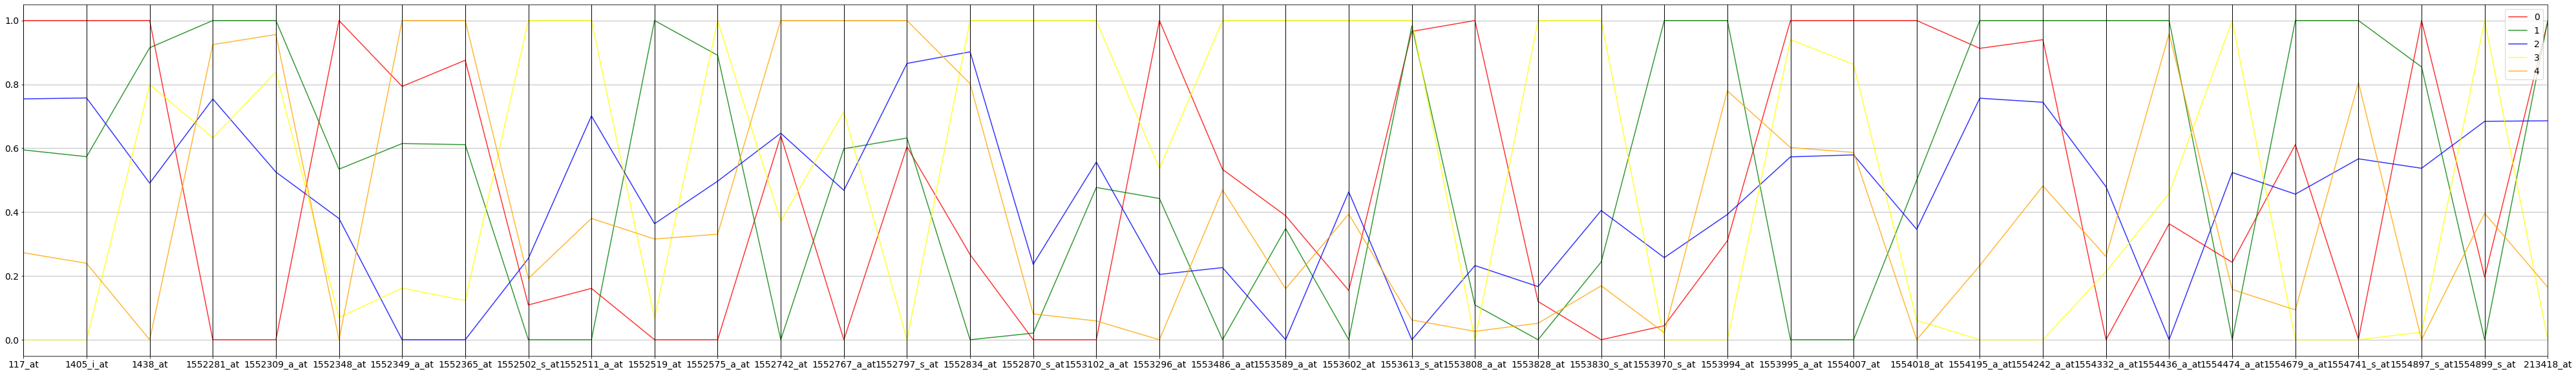

In [ ]:
plt.rcParams["figure.figsize"] = (70, 10)
pd.plotting.parallel_coordinates(mean3,"Clusters", color=colors, alpha=0.8)

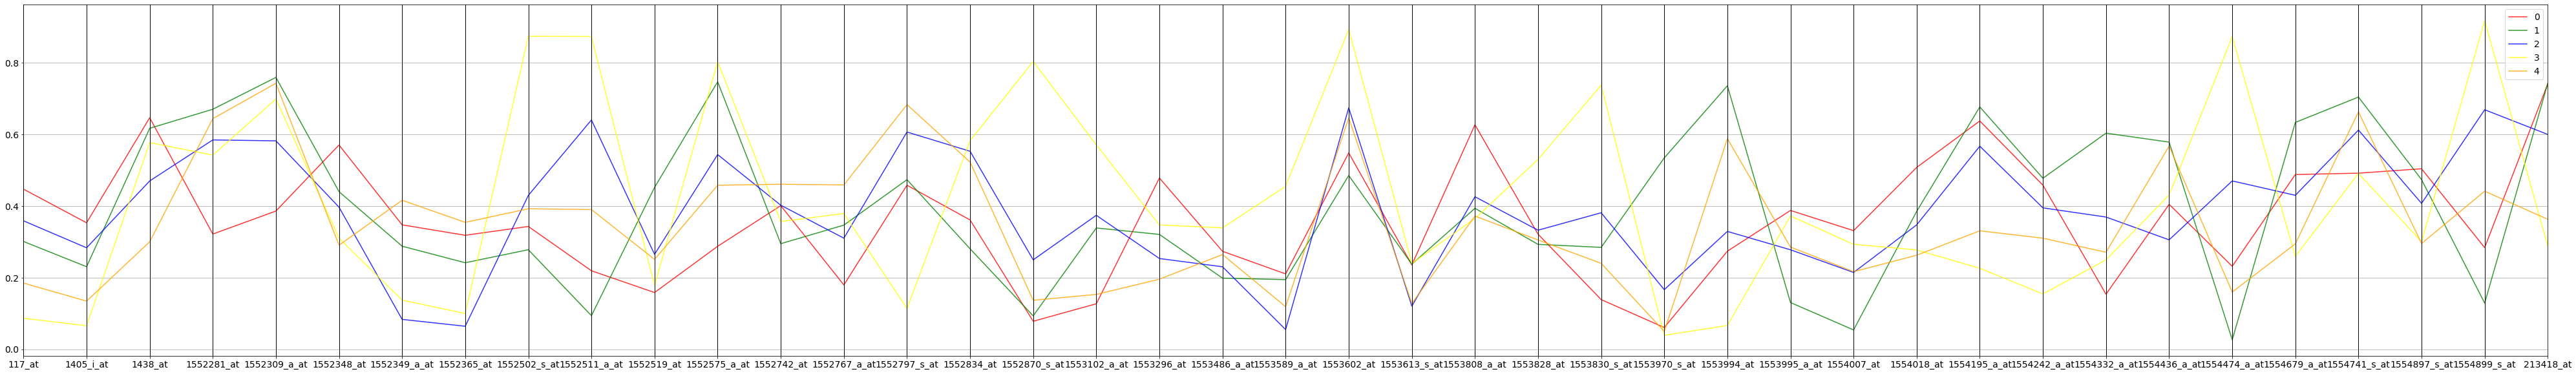

In [ ]:
plt.rcParams["figure.figsize"] = (70, 10)
pd.plotting.parallel_coordinates(mean,"Clusters", color=colors, alpha=0.8)

In [ ]:
imp.columns

Index(['1554242_a_at', '1553486_a_at', '1553828_at', '1554897_s_at',
       '1553970_s_at', '1552502_s_at', '1553830_s_at', '1552834_at',
       '1554436_a_at', 'Clusters'],
      dtype='object')

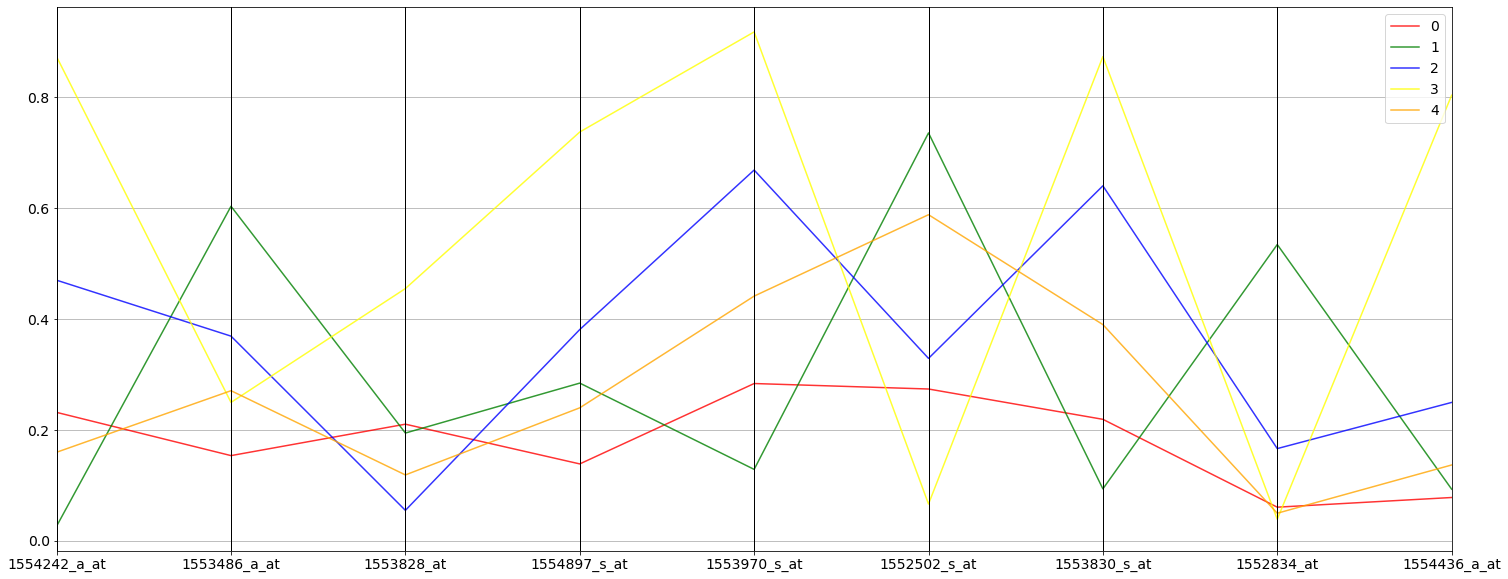

In [ ]:
mean_imp= pd.DataFrame()

for i in np.unique(imp.Clusters):
  cluster2 =imp[imp.Clusters == i]
  cluster2= cluster2.drop("Clusters", axis ="columns")
  for j in range(9):
    mj= sum(cluster2.iloc[:,j-1])
    mj=mj/len(cluster2)
    mean_imp.loc[i,j-1]=mj
mean_imp = mean_imp.set_axis(['1554242_a_at', '1553486_a_at', '1553828_at', '1554897_s_at',
'1553970_s_at', '1552502_s_at', '1553830_s_at', '1552834_at',
'1554436_a_at'], axis=1)
mean_imp["Clusters"]=[0,1,2,3,4]
plt.rcParams["figure.figsize"] = (25, 10)
pd.plotting.parallel_coordinates(mean_imp,"Clusters", color=colors, alpha=0.8)

In [ ]:
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(imp, imp["Clusters"], test_size=0.2, random_state = 1)
#{using RandomForestClassifier}
rfor3 = RandomForestClassifier(random_state = 0)
rfor3.fit(X_train_imp, y_train_imp)
print(rfor3.score(X_test_imp,y_test_imp))

1.0


ValueError: ignored

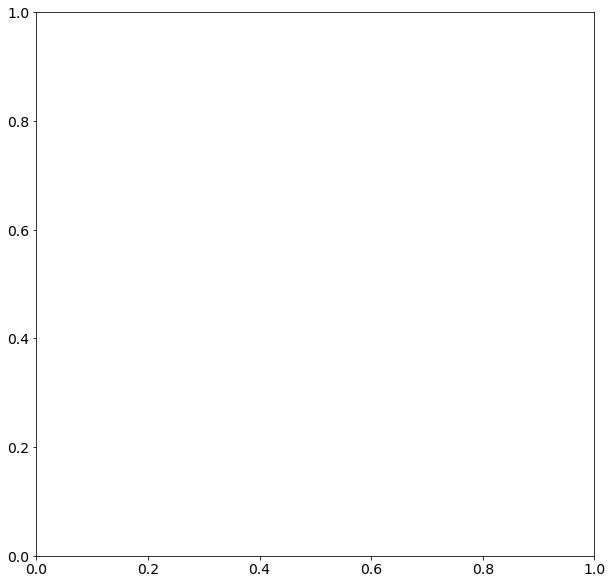

In [ ]:
#visulaizing the clusters  
plt.figure(figsize=(10, 10)) 
for i in range(18):
 plt.scatter(zero.iloc[i,:],zero.index , s = 30, c = 'blue', label = 'Cluster 1') 
for j in range(22): 
 plt.scatter(one.iloc[j,:], one.index , s = 30, c = 'green', label = 'Cluster 2')  
for k in range(19):
 plt.scatter( two.iloc[k,:],two.index , s = 30, c = 'red', label = 'Cluster 3')  
#for l in range(0): 
 #plt.scatter(three.columns ,three.iloc[l,:], s = 100, c = 'pink', label = 'Cluster 4')  
#for m in range(4):
 #plt.scatter(four.columns , four.iloc[m,:], s = 100, c = 'yellow', label = 'Cluster 5') 

 
plt.title('Hierarichal')  
plt.xlabel('Patients')  
plt.ylabel('Gene expression')  
plt.legend()  
plt.show()  

In [ ]:
centroids = km.cluster_centers_
u_labels = np.unique(y_pred2)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(crc_var[y_pred2 == i , 0] , crc_var[y_pred2 == i, 1 ] , y_pred2 = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = "black")
plt.legend()
plt.show()

In [ ]:
#visulaizing the clusters  
plt.scatter(y_pred2 == 0, s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(crc_var[y_pred2 == 1, 0], crc_var[y_pred2 == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(crc_var[y_pred2 == 2, 0], crc_var[y_pred2 == 2, 1], s = 100, c = 'red', label = 'Cluster 3')   
plt.title('KMeans')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  

In [ ]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x = sc.fit_transform(x)



In [ ]:
x.shape


In [ ]:
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score

pca = PCA(62)

x_pca = pca.fit_transform(x)
x_pca.shape

In [ ]:
explained_variane = pca.explained_variance_ratio_
explained_variane

In [ ]:
pca.n_components_

In [ ]:

classifier2 = LogisticRegression(random_state = 0)

classifier2.fit(x_train, y_train)


classifier2.score(x_test,y_test)

In [ ]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:60], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

In [ ]:
type(x_pca)

In [ ]:
xDF = pd.DataFrame(x_pca)
yDF = pd.DataFrame(y)

In [ ]:
# View scatterplot
scatterPlot(xDF, yDF , "PCA")

In [ ]:

import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x_pca, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("geans")  
plt.show()  



In [ ]:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x_pca)  

In [ ]:
#visulaizing the clusters  
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 80, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
plt.title('Hierarichal')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  

In [ ]:
#training the hierarchical model on dataset  
from sklearn.cluster import KMeans  
km = KMeans(n_clusters=5)  
y_pred2= km.fit_predict(x_pca) 

In [ ]:
#visulaizing the clusters  
plt.scatter(x[y_pred2 == 0, 0], x[y_pred2 == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_pred2 == 1, 0], x[y_pred2 == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_pred2 == 2, 0], x[y_pred2 == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
plt.scatter(x[y_pred2 == 3, 0], x[y_pred2 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.scatter(x[y_pred2 == 4, 0], x[y_pred2 == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
plt.title('KMeans')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline

In [ ]:
# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(
    StandardScaler(),
    NeighborhoodComponentsAnalysis(random_state=0),
)

x_train2 = lda.fit_transform(x_train, y_train)

x_test2 = lda.transform(x_test)

x_train3 = nca.fit_transform(x_train, y_train)

x_test3 = nca.transform(x_test)



#fitting logistic Regression to training set

from sklearn.linear_model import LogisticRegression

classifier1 = LogisticRegression(random_state = 0)

classifier1.fit(x_train2, y_train)

classifier2 = LogisticRegression(random_state = 0)

classifier2.fit(x_train3, y_train)



#predicting results



y_pred2 = classifier.predict(x_test)

y_pred3 = classifier.predict(x_test)

print("accuracy score lda:", accuracy_score(y_test,y_pred2))
print("accuracy score nca:", accuracy_score(y_test,y_pred3))

In [ ]:
# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(
    StandardScaler(),
    NeighborhoodComponentsAnalysis(random_state=0),
)

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=3)

# Make a list of the methods to be compared
dim_reduction_methods = [("PCA", pca), ("LDA", lda), ("NCA", nca)]


# Fit the method's model
lda1 = lda.fit(x_train, y_train)
nca1= nca.fit(x_train, y_train)

# Fit a nearest neighbor classifier on the embedded training set
a = knn.fit(lda.transform(x_train), y_train)
b = knn.fit(nca.transform(x_train), y_train)

m = lda.transform(x_test)
   
m.shape

In [ ]:
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(m, y_test)
acc_knn2 = knn.score(nca.transform(x_test), y_test)

print("lda accuracy"+ acc_knn1+"nca accuracy"+acc_knn2)